In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                            roc_curve, confusion_matrix, classification_report, 
                            accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier



## Integrantes 
* Jesús Javier Ramírez hernandez
Cc: 1063156929

* Junior José Solano de arco 
Cc: 1070823445

* Diosmar Enrique Reyes López
C.C. 1.063.150.198

*  Ivan rene castellar urueta 
C.C 1063175500

* Macyuris Díaz calle
C.C. 1.063.718.685

* Jose Eduardo Pinto Ramos
CC 1063150896

In [286]:
# Lectura del dataset
df = pd.read_csv('Homicidios_Col-2.csv')
df.head()

,departamento,municipio,codigo,arma,fecha,genero,edad_grupo,cantidad
0,ANTIOQUIA,AMAGÁ,5030000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
1,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
2,ANTIOQUIA,RIONEGRO,5615000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
3,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
4,ATLÁNTICO,MALAMBO,8433000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1


### Explorando columnas del dataset

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130024 entries, 0 to 130023
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  130024 non-null  object
 1   municipio     130024 non-null  object
 2   codigo        130024 non-null  int64 
 3   arma          130024 non-null  object
 4   fecha         130024 non-null  object
 5   genero        130024 non-null  object
 6   edad_grupo    130024 non-null  object
 7   cantidad      130024 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 7.9+ MB


### Detectando valores perdidos

In [288]:
df[df["departamento"].isna()]

,departamento,municipio,codigo,arma,fecha,genero,edad_grupo,cantidad


In [289]:
df[df["municipio"].isna()]

,departamento,municipio,codigo,arma,fecha,genero,edad_grupo,cantidad


In [290]:
df[df["codigo"].isna()]

,departamento,municipio,codigo,arma,fecha,genero,edad_grupo,cantidad


### cuantos valores NaN hay en el dataframe?

In [291]:
len(df[df.isna().any(axis=1)])

0

### Cuales son los municipios que tienen el mismo codigo?

In [292]:
df_filtrado = df[['municipio', 'codigo']].drop_duplicates().sort_values(by='municipio')
df_filtrado[df_filtrado.duplicated(subset=['codigo']) == True]

,municipio,codigo


### limpiar nombre de departamentos y municipio

In [293]:
#Reeemplazando coincidencia "(CT)" en la columna municipio y reemplazando por una cadena vacia
df=df.replace({'municipio': r'.CT.$'}, {'municipio': ''}, regex=True)
# df.replace(regex=r'.CT.$', value='')

In [294]:
df

,departamento,municipio,codigo,arma,fecha,genero,edad_grupo,cantidad
0,ANTIOQUIA,AMAGÁ,5030000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
1,ANTIOQUIA,MEDELLÍN,5001000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
2,ANTIOQUIA,RIONEGRO,5615000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
3,ATLÁNTICO,BARRANQUILLA,8001000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
4,ATLÁNTICO,MALAMBO,8433000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
130019,VALLE,GUADALAJARA DE BUGA,76111000,CONTUNDENTES,08/05/2021,MASCULINO,ADULTOS,1
130020,VALLE,JAMUNDÍ,76364000,CONTUNDENTES,21/03/2021,MASCULINO,ADULTOS,1
130021,VALLE,PALMIRA,76520000,CONTUNDENTES,09/02/2021,FEMENINO,ADULTOS,1
130022,VALLE,PALMIRA,76520000,CONTUNDENTES,12/05/2021,MASCULINO,ADULTOS,1


In [295]:
df['arma'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CORTANTES',
       'PUNZANTES', 'CONTUNDENTES', 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA',
       'MINA ANTIPERSONA', 'CUERDA/SOGA/CADENA', 'COMBUSTIBLE',
       'BOLSA PLASTICA', 'MOTO BOMBA', 'GRANADA DE MANO', 'PAQUETE BOMBA',
       'SUSTANCIAS TOXICAS', 'SIN EMPLEO DE ARMAS', 'JERINGA',
       'CARRO BOMBA', 'NO REPORTADO', 'PERSONA BOMBA', 'CINTAS/CINTURON',
       'ESCOPOLAMINA', 'ALMOHADA', 'CILINDRO BOMBA',
       'ARTEFACTO INCENDIARIO', 'VENENO', 'ROCKET', 'QUIMICOS',
       'OLLA BOMBA', 'GASES', 'NO REPORTADA', 'GRANADA DE MORTERO',
       'CASA BOMBA', 'MEDICAMENTOS', 'ACIDO',
       'POLVORA(FUEGOS PIROTECNICOS)', 'PRENDAS DE VESTIR', 'LIQUIDOS'],
      dtype=object)

Dividimos la fecha en una columna mes, dia, año y tipo de dias 

In [296]:
# creamos una columna para el año 
df['año'] = df['fecha'].apply(lambda x: x.split('/')[2])

In [297]:
df['mes']=df['fecha'].apply(lambda x: x.split('/')[1])

In [298]:
# calculamos el dia  del mes 
df['dia_mes']=df['fecha'].apply(lambda x: x.split('/')[0])

In [299]:
# convertimos a formato se fecha 
df['fecha'] = pd.to_datetime(df['fecha'])

In [300]:
# obtenemos la columna dia compra en el numero del dia 
df['dia'] = df['fecha'].dt.dayofweek

In [301]:
# calculamos los nombres de los dias de la semana 
df['dia'] = ["Lunes" if (f==0) else "Martes" if (f==1) else "Miercoles" if (f==2) else "Jueves" if f==3 else 'Viernes' if f==4 else 'Sabado' if f==5 else 'Domingo' for f in df['dia']]

sacamos el nombre del mes 

In [302]:
df['mes'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [303]:
# calculamos los nombres de los 

#df['mes'] = ["Enero" if (f=='01') else "Febrero" if (f=='02') else "Marzo" if (f=='03') else "Abril" if f=='04'
 #else 'Mayo' if f=='05' else 'Junio' if f=='06' else 'Julio' if f=='07' else 'Agosto' if f=='08' 
 #else 'Septiembre' if f=='09' else 'Octubre' if f=='10' else 'Noviembre' if f=='11' else 'Diciembre'
 #for f in df['mes']]


In [304]:
df['dia_mes'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

elimino la varible  fecha 


In [305]:
df.drop(columns = ['fecha'], inplace = True)

In [306]:
df['edad_grupo'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', ' '], dtype=object)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130024 entries, 0 to 130023
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  130024 non-null  object
 1   municipio     130024 non-null  object
 2   codigo        130024 non-null  int64 
 3   arma          130024 non-null  object
 4   genero        130024 non-null  object
 5   edad_grupo    130024 non-null  object
 6   cantidad      130024 non-null  int64 
 7   año           130024 non-null  object
 8   mes           130024 non-null  object
 9   dia_mes       130024 non-null  object
 10  dia           130024 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.9+ MB


In [308]:
# El fin de semana también lo podría colocar como una categoría si quisiera
df['tipo_de _dia'] = np.where(df['dia'].isin(['Sabado','Domingo']),'Fin de semana','Dia  semana')

In [309]:
## comvertimos la columna años en int
df['año']=df.año.astype(int)

In [310]:
df.head()

,departamento,municipio,codigo,arma,genero,edad_grupo,cantidad,año,mes,dia_mes,dia,tipo_de _dia
0,ANTIOQUIA,AMAGÁ,5030000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,01,01,Viernes,Dia semana
1,ANTIOQUIA,MEDELLÍN,5001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,01,01,Viernes,Dia semana
2,ANTIOQUIA,RIONEGRO,5615000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,01,01,Viernes,Dia semana
3,ATLÁNTICO,BARRANQUILLA,8001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,01,01,Viernes,Dia semana
4,ATLÁNTICO,MALAMBO,8433000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,01,01,Viernes,Dia semana


In [311]:
df = df.reindex(columns=['codigo','municipio','departamento','año','mes','dia_mes','dia','tipo_de _dia','arma','genero','edad_grupo','cantidad'])

In [312]:
df.head()

,codigo,municipio,departamento,año,mes,dia_mes,dia,tipo_de _dia,arma,genero,edad_grupo,cantidad
0,5030000,AMAGÁ,ANTIOQUIA,2010,01,01,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
1,5001000,MEDELLÍN,ANTIOQUIA,2010,01,01,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
2,5615000,RIONEGRO,ANTIOQUIA,2010,01,01,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
3,8001000,BARRANQUILLA,ATLÁNTICO,2010,01,01,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
4,8433000,MALAMBO,ATLÁNTICO,2010,01,01,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1


In [313]:
df['año'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [314]:
df.to_excel('datosLimpio.xlsx', index=False)

In [315]:
df.describe()

,codigo,año,cantidad
count,1.300240e+05,130024.000000,130024.000000
mean,3.893931e+07,2015.284124,1.205593
std,2.857809e+07,3.412897,0.716134
min,5.001000e+06,2010.000000,1.000000
25%,1.100100e+07,2012.000000,1.000000
50%,2.700100e+07,2015.000000,1.000000
75%,6.886100e+07,2018.000000,1.000000
max,9.977300e+07,2021.000000,16.000000


<Figure size 1080x576 with 0 Axes>

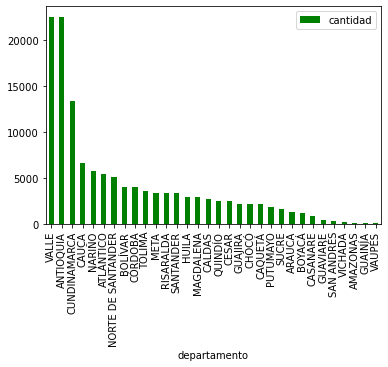

In [316]:
# Verificamos con un grafico 
plt.figure(figsize = (15,8))
pd.DataFrame(df.groupby('departamento')['cantidad'].count()).sort_values(by='cantidad',ascending=False).plot(kind='bar',color='green')
plt.show()

In [317]:
df=df.replace({'municipio': r'MEDELLÍN '}, {'municipio': 'MEDELLIN'}, regex=True)

* como Antioquia es uno de los departamentos con mayor cantidad de homicidios haremos un filtro para esos datos 


In [318]:
datosDepAntioquia=df[df['departamento']=='ANTIOQUIA']

In [319]:
datosDepAntioquia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22459 entries, 0 to 129755
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codigo        22459 non-null  int64 
 1   municipio     22459 non-null  object
 2   departamento  22459 non-null  object
 3   año           22459 non-null  int32 
 4   mes           22459 non-null  object
 5   dia_mes       22459 non-null  object
 6   dia           22459 non-null  object
 7   tipo_de _dia  22459 non-null  object
 8   arma          22459 non-null  object
 9   genero        22459 non-null  object
 10  edad_grupo    22459 non-null  object
 11  cantidad      22459 non-null  int64 
dtypes: int32(1), int64(2), object(9)
memory usage: 2.1+ MB


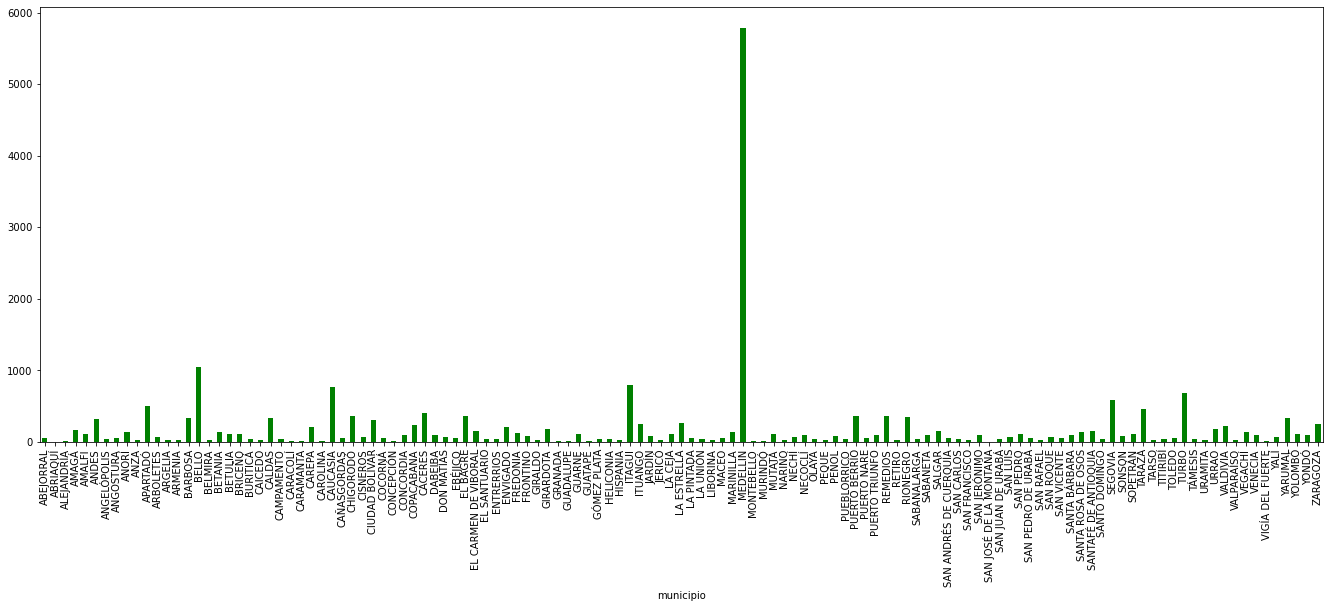

In [320]:
# Verificamos con un grafico 
plt.figure(figsize = (23,8))
datosDepAntioquia.groupby("municipio")['cantidad'].count().plot(kind='bar',color='green')
plt.show()

* organizamos el nombre del municipio Medellin 

* filtramos por municipios 

In [321]:
datosMunMedellin=datosDepAntioquia[datosDepAntioquia['municipio']=='MEDELLIN']


In [322]:
df.municipio.unique()

array(['AMAGÁ', 'MEDELLIN', 'RIONEGRO', ..., 'SOPLAVIENTO', 'CHIVOR',
       'UBAQUE'], dtype=object)

In [323]:
datosMunMedellin

,codigo,municipio,departamento,año,mes,dia_mes,dia,tipo_de _dia,arma,genero,edad_grupo,cantidad
1,5001000,MEDELLIN,ANTIOQUIA,2010,01,01,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
26,5001000,MEDELLIN,ANTIOQUIA,2010,01,01,Viernes,Dia semana,ARMA DE FUEGO,MASCULINO,ADULTOS,5
62,5001000,MEDELLIN,ANTIOQUIA,2010,01,02,Lunes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
97,5001000,MEDELLIN,ANTIOQUIA,2010,01,03,Lunes,Dia semana,ARMA DE FUEGO,MASCULINO,ADULTOS,3
121,5001000,MEDELLIN,ANTIOQUIA,2010,01,04,Jueves,Dia semana,ARMA DE FUEGO,FEMENINO,ADOLESCENTES,1
...,...,...,...,...,...,...,...,...,...,...,...,...
129730,5001000,MEDELLIN,ANTIOQUIA,2021,06,29,Martes,Dia semana,CONTUNDENTES,MASCULINO,ADULTOS,1
129731,5001000,MEDELLIN,ANTIOQUIA,2021,07,11,Domingo,Fin de semana,CONTUNDENTES,MASCULINO,ADULTOS,1
129732,5001000,MEDELLIN,ANTIOQUIA,2021,07,15,Jueves,Dia semana,CONTUNDENTES,MASCULINO,ADULTOS,1
129733,5001000,MEDELLIN,ANTIOQUIA,2021,07,18,Domingo,Fin de semana,CONTUNDENTES,MASCULINO,ADULTOS,1


In [422]:
df.año

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
130019    2021
130020    2021
130021    2021
130022    2021
130023    2021
Name: año, Length: 130024, dtype: int32

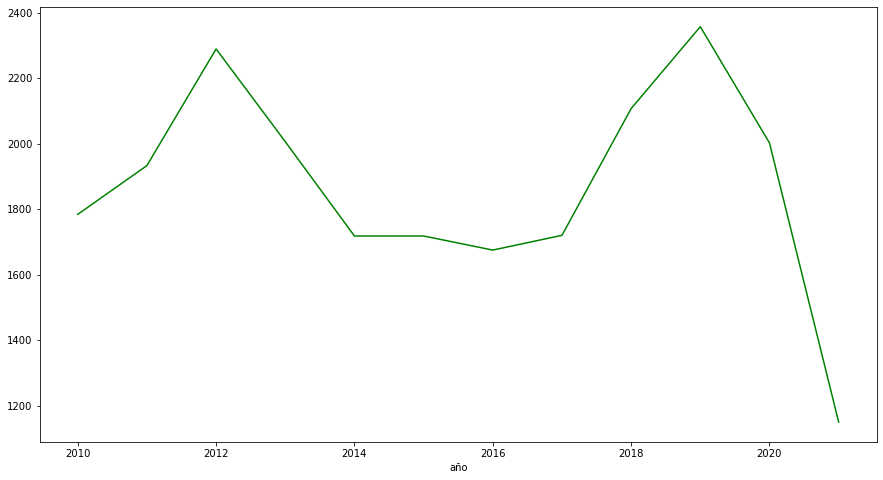

In [418]:
# Verificamos con un grafico  en que año hubieron mas homicidios 
plt.figure(figsize = (15,8))
datosDepAntioquia.groupby("año")['cantidad'].count().plot(kind='line',color='green')
plt.show()

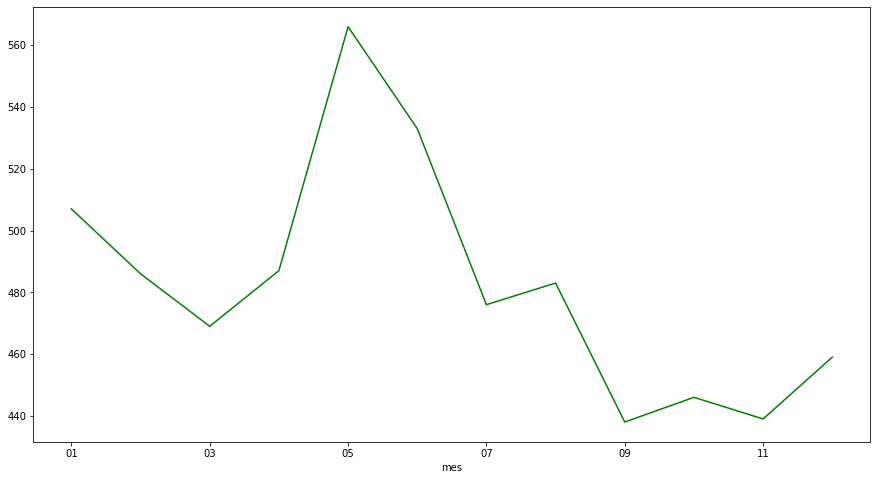

In [325]:
# Verificamos con un grafico  en que mes hubieron mas homicidios 
plt.figure(figsize = (15,8))
datosMunMedellin.groupby("mes")['cantidad'].count().plot(kind='line',color='green')
plt.show()

<Figure size 1656x576 with 0 Axes>

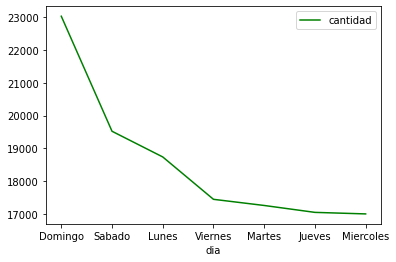

In [326]:
# Verificamos con un grafico  en que tipo de dias hubieron mas homicidios 
plt.figure(figsize = (23,8))
pd.DataFrame(df.groupby('dia')['cantidad'].count()).sort_values(by='cantidad',ascending=False).plot(kind='line',color='green')
plt.show()

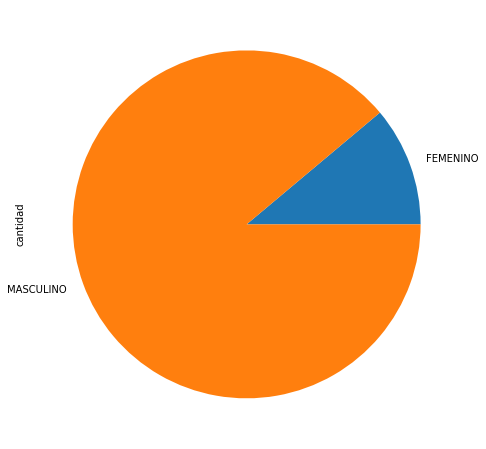

In [327]:
plt.figure(figsize = (15,8))
datosMunMedellin.groupby("genero")['cantidad'].count().plot(kind='pie')
plt.show()

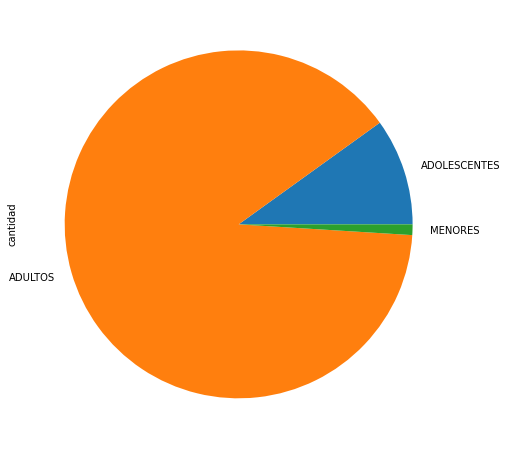

In [328]:
plt.figure(figsize = (15,8))
datosMunMedellin.groupby("edad_grupo")['cantidad'].count().plot(kind='pie')
plt.show()

In [329]:
def heatmap_count(df, var1, var2):


  heat_df=[]
  heat_df=pd.DataFrame(df.groupby([var1,var2]).count().iloc[:,1]).reset_index()
  cols=heat_df.columns
  value=[y for y in cols if y not in [var1, var2]]
  heat_df=heat_df.pivot(columns=var1, index=var2, values=value[0])
  plt.figure(figsize=(15,5))
  return sns.heatmap(heat_df, cmap="Greens",linewidths=0.5, annot=True, fmt='g')
  

<AxesSubplot:xlabel='mes', ylabel='año'>

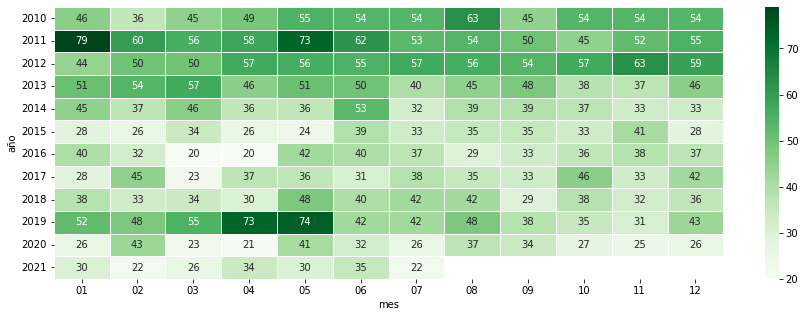

In [330]:
heatmap_count(datosMunMedellin, "mes", "año")

In [331]:
df['mes']=df.mes.astype(int)
df['dia_mes']=df.dia_mes.astype(int)

In [332]:
df.head()

,codigo,municipio,departamento,año,mes,dia_mes,dia,tipo_de _dia,arma,genero,edad_grupo,cantidad
0,5030000,AMAGÁ,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
1,5001000,MEDELLIN,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
2,5615000,RIONEGRO,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
3,8001000,BARRANQUILLA,ATLÁNTICO,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
4,8433000,MALAMBO,ATLÁNTICO,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1


In [333]:
# colomnas A predecir 
data = df[['municipio','departamento','año','mes','dia_mes','arma','genero','edad_grupo',]].copy()

In [334]:
data.head()

,municipio,departamento,año,mes,dia_mes,arma,genero,edad_grupo
0,AMAGÁ,ANTIOQUIA,2010,1,1,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS
1,MEDELLIN,ANTIOQUIA,2010,1,1,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS
2,RIONEGRO,ANTIOQUIA,2010,1,1,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS
3,BARRANQUILLA,ATLÁNTICO,2010,1,1,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS
4,MALAMBO,ATLÁNTICO,2010,1,1,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS


In [400]:
data_to_model=pd.get_dummies(data, drop_first=True)
data_to_model.head()

,año,mes,dia_mes,municipio_ABREGO,municipio_ABRIAQUÍ,municipio_ACACÍAS,municipio_ACANDÍ,municipio_ACEVEDO,municipio_ACHÍ,municipio_AGRADO,...,arma_QUIMICOS,arma_ROCKET,arma_SIN EMPLEO DE ARMAS,arma_SUSTANCIAS TOXICAS,arma_VENENO,genero_MASCULINO,genero_NO REPORTA,edad_grupo_ADOLESCENTES,edad_grupo_ADULTOS,edad_grupo_MENORES
0,2010,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2010,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2010,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2010,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2010,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [403]:
print(list(data_to_model.columns))

['año', 'mes', 'dia_mes', 'municipio_ABREGO', 'municipio_ABRIAQUÍ', 'municipio_ACACÍAS', 'municipio_ACANDÍ', 'municipio_ACEVEDO', 'municipio_ACHÍ', 'municipio_AGRADO', 'municipio_AGUA DE DIOS', 'municipio_AGUACHICA', 'municipio_AGUADAS', 'municipio_AGUAZUL', 'municipio_AGUSTÍN CODAZZI', 'municipio_AIPE', 'municipio_ALBANIA', 'municipio_ALBÁN', 'municipio_ALCALÁ', 'municipio_ALDANA', 'municipio_ALEJANDRÍA', 'municipio_ALGARROBO', 'municipio_ALGECIRAS', 'municipio_ALMAGUER', 'municipio_ALMEIDA', 'municipio_ALPUJARRA', 'municipio_ALTAMIRA', 'municipio_ALTO BAUDÓ', 'municipio_ALTOS DEL ROSARIO', 'municipio_ALVARADO', 'municipio_AMAGÁ', 'municipio_AMALFI', 'municipio_AMBALEMA', 'municipio_ANAPOIMA', 'municipio_ANCUYÁ', 'municipio_ANDALUCÍA', 'municipio_ANDES', 'municipio_ANGELÓPOLIS', 'municipio_ANGOSTURA', 'municipio_ANOLAIMA', 'municipio_ANORÍ', 'municipio_ANSERMA', 'municipio_ANSERMANUEVO', 'municipio_ANZA', 'municipio_ANZOÁTEGUI', 'municipio_APARTADÓ', 'municipio_APULO', 'municipio_APÍA

In [375]:
df.groupby(['departamento','municipio','año','mes','dia_mes','arma','genero','edad_grupo']).sum().reset_index().drop(columns='codigo')


,departamento,municipio,año,mes,dia_mes,arma,genero,edad_grupo,cantidad
0,AMAZONAS,LETICIA,2010,2,17,ARMA DE FUEGO,MASCULINO,ADULTOS,1
1,AMAZONAS,LETICIA,2010,2,26,ARMA DE FUEGO,MASCULINO,ADULTOS,1
2,AMAZONAS,LETICIA,2010,4,5,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADOLESCENTES,1
3,AMAZONAS,LETICIA,2010,4,10,CONTUNDENTES,MASCULINO,ADULTOS,1
4,AMAZONAS,LETICIA,2010,5,7,ARMA DE FUEGO,MASCULINO,ADULTOS,1
...,...,...,...,...,...,...,...,...,...
126215,VICHADA,PUERTO CARREÑO,2021,6,24,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
126216,VICHADA,SANTA ROSALÍA,2010,2,11,ARMA DE FUEGO,MASCULINO,ADULTOS,1
126217,VICHADA,SANTA ROSALÍA,2010,10,29,ARMA DE FUEGO,MASCULINO,ADULTOS,2
126218,VICHADA,SANTA ROSALÍA,2018,6,19,ARMA DE FUEGO,MASCULINO,ADULTOS,1


In [376]:
df.columns

Index(['codigo', 'municipio', 'departamento', 'año', 'mes', 'dia_mes', 'dia',
       'tipo_de _dia', 'arma', 'genero', 'edad_grupo', 'cantidad'],
      dtype='object')

In [338]:
df

,codigo,municipio,departamento,año,mes,dia_mes,dia,tipo_de _dia,arma,genero,edad_grupo,cantidad
0,5030000,AMAGÁ,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
1,5001000,MEDELLIN,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
2,5615000,RIONEGRO,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
3,8001000,BARRANQUILLA,ATLÁNTICO,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
4,8433000,MALAMBO,ATLÁNTICO,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130019,76111000,GUADALAJARA DE BUGA,VALLE,2021,5,8,Jueves,Dia semana,CONTUNDENTES,MASCULINO,ADULTOS,1
130020,76364000,JAMUNDÍ,VALLE,2021,3,21,Domingo,Fin de semana,CONTUNDENTES,MASCULINO,ADULTOS,1
130021,76520000,PALMIRA,VALLE,2021,2,9,Jueves,Dia semana,CONTUNDENTES,FEMENINO,ADULTOS,1
130022,76520000,PALMIRA,VALLE,2021,5,12,Domingo,Fin de semana,CONTUNDENTES,MASCULINO,ADULTOS,1


In [377]:
def get_X_y(df, y_name):

  y=[y_name]
  X=[col for col in df.columns if col not in y]
  y=df[y].copy().values.flatten()
  X=pd.get_dummies(df[X].copy())
  return X, y


def data_preprocessing_up_or_down_sample(X, y, sample="up", test_size=0.2):
 
  a,b=0,0
  if sample=="up": 
    a,b=1,0
  if sample=="down":
    a,b=0,1 

  
  # Apply the normal train_test_split to the data
  X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                        test_size=test_size)
  # Using the a and b local variables, apply downsampling or upsampling only
  # if the sample parameter is "up" or "down".

  if a+b>=1:
    X_train_temp, y_train_temp = resample(X_train[y_train == a],
                                    y_train[y_train == a],
                                    n_samples=X_train[y_train == b].shape[0])
    X_train = np.concatenate((X_train[y_train == b], X_train_temp))
    y_train = np.concatenate((y_train[y_train == b], y_train_temp))
  return (X_train, X_test, y_train, y_test)


def rocauc_plot(model, model_name, y_test, X_test):

  try:
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
  except:
    auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
  plt.plot(fpr, tpr, label=model_name+" AUC = {:.5f}".format(auc))
  plt.title("Curva(s) ROC", fontdict={"fontsize": 21})
  plt.xlabel("False positive rate", fontdict={"fontsize": 13})
  plt.ylabel("True positive rate", fontdict={"fontsize": 13})
  plt.legend(loc="lower right")
  plt.plot([0, 1], [0, 1], "r--")



def plot_roc_conf_matrix(y_test,X_test, model, model_name):

  try:
    y_pred=model.predict_classes(X_test)
  except:
    y_pred=model.predict(X_test)
  cm = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
  plt.title(model_name+ " - Matriz de confusión", y=1.1, \
            fontdict={"fontsize": 21})
  plt.xlabel("Predicted", fontdict={"fontsize": 14})
  plt.ylabel("Actual", fontdict={"fontsize": 14})
 
  print(classification_report(y_test, y_pred))
  plt.subplot(1,2,2)

  rocauc_plot(model, model_name, y_test, X_test)


def apply_model_to_df(data, model, model_name):

  X_train, X_test, y_train, y_test=data
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plot_roc_conf_matrix(y_test,X_test, model, model_name)
  return model

In [378]:
X,y=get_X_y(data, "departamento")
# Como en la función dijimos que test_size por defecto es 0.2, si no lo damos, se asume ese valor
X_train, X_test, y_train, y_test = data_preprocessing_up_or_down_sample(X, y, sample="down")
X_train


array([], shape=(0, 1048), dtype=int32)

In [379]:
datosMuamaga=datosDepAntioquia[datosDepAntioquia['municipio']=='AMAGÁ']


In [380]:
df['departamento'].unique()

array(['ANTIOQUIA', 'ATLÁNTICO', 'CALDAS', 'CAQUETÁ', 'CAUCA', 'CESAR',
       'CUNDINAMARCA', 'HUILA', 'NARIÑO', 'QUINDÍO', 'SANTANDER',
       'TOLIMA', 'VALLE', 'BOLÍVAR', 'GUAVIARE', 'RISARALDA', 'SUCRE',
       'GUAJIRA', 'PUTUMAYO', 'CASANARE', 'META', 'CHOCÓ', 'CÓRDOBA',
       'ARAUCA', 'NORTE DE SANTANDER', 'BOYACÁ', 'MAGDALENA', 'VICHADA',
       'SAN ANDRÉS', 'AMAZONAS', 'GUAINÍA', 'VAUPÉS'], dtype=object)

creamos el modelo de predicion 

In [381]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [423]:
X,y =get_X_y(datosMunMedellin, 'cantidad')
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2)

y_train

array([6, 1, 2, ..., 1, 1, 2], dtype=int64)

In [383]:
list(datosMunMedellin['municipio'].unique())

['MEDELLIN']

In [384]:
model=make_pipeline(StandardScaler(),RandomForestRegressor())

In [385]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [424]:
y_predi=model.predict(X_test)
y_predi

array([1.69, 1.13, 1.21, ..., 1.13, 1.03, 1.  ])

In [387]:
X_test

,codigo,año,municipio_MEDELLIN,departamento_ANTIOQUIA,mes_01,mes_02,mes_03,mes_04,mes_05,mes_06,...,arma_PUNZANTES,arma_QUIMICOS,arma_SIN EMPLEO DE ARMAS,arma_SUSTANCIAS TOXICAS,arma_VENENO,genero_FEMENINO,genero_MASCULINO,edad_grupo_ADOLESCENTES,edad_grupo_ADULTOS,edad_grupo_MENORES
84391,5001000,2017,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
95506,5001000,2018,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
116839,5001000,2020,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2589,5001000,2010,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
52221,5001000,2014,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32265,5001000,2012,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
101977,5001000,2019,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
11537,5001000,2011,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
24621,5001000,2012,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [388]:
mean_squared_error(y_true=y_test,y_pred=y_predi)

0.8341497417962003

In [389]:
test=pd.DataFrame([y_predi,y_test]).T.rename(columns={0:'y_predi',1:'y_test'})
test['y_predi']=test['y_predi'].apply(lambda x: round(x))
test.head()

,y_predi,y_test
0,2,1.0
1,2,2.0
2,1,1.0
3,1,1.0
4,1,1.0


In [390]:
test['dif']=test['y_predi']-test['y_test']
test.sort_values(by='dif').head()

,y_predi,y_test,dif
970,3,10.0,-7.0
701,2,7.0,-5.0
302,2,7.0,-5.0
1064,3,7.0,-4.0
471,2,6.0,-4.0


In [391]:
test.dif.apply(lambda x: x==0).sum()/len(test)*100

66.75302245250433

In [354]:
try:
    
    from pydantic import BaseModel as PydanticBaseModel
    from pydantic import Field
    from typing import  Literal
    import joblib
    import pandas as pd
    import datetime as dt
    import os
    import numpy as np
    from fastapi import  HTTPException
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.utils import resample
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.pipeline import make_pipeline
    from sklearn.model_selection import  GridSearchCV, train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn import metrics
    from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                                roc_curve, confusion_matrix, classification_report, 
                                accuracy_score)
except:
    !pip install pydantic --user
    !pip install typing --user
    !pip install joblib --user
    !pip install pandas --user
    !pip install fastapi --user
    !pip install sklean --user

In [355]:
joblib.dump(model, 'modelo.pkl')

['modelo.pkl']

In [356]:
# Lo cargamos y predecimos con él
modelo_cargado=joblib.load('modelo.pkl')
modelo_cargado.predict(X_test)

array([1.98, 1.08, 1.  , ..., 1.98, 1.69, 1.  ])

In [357]:
class ModelInput(PydanticBaseModel):


   # satisfaction_level: float = Field(description="Nivel de Satisfacción", ge=0, le=1)
   #average_montly_hours: int = Field(
   #     description="Horas promedio trabajas al mes", ge=8, le=310)
  
    departamento: Literal['ANTIOQUIA', 'ATLÁNTICO', 'CALDAS', 'CAQUETÁ', 'CAUCA', 'CESAR', 'CUNDINAMARCA', 'HUILA', 'NARIÑO', 'QUINDÍO', 'SANTANDER', 'TOLIMA', 'VALLE', 'BOLÍVAR', 'GUAVIARE', 'RISARALDA', 'SUCRE', 'GUAJIRA', 'PUTUMAYO', 'CASANARE', 'META', 'CHOCÓ', 'CÓRDOBA', 'ARAUCA', 'NORTE DE SANTANDER', 'BOYACÁ', 'MAGDALENA', 'VICHADA', 'SAN ANDRÉS', 'AMAZONAS', 'GUAINÍA', 'VAUPÉS']
    ciudad: Literal['AMAGÁ', 'MEDELLIN', 'RIONEGRO', 'BARRANQUILLA ', 'MALAMBO', 'SAN JOSÉ', 'CARTAGENA DEL CHAIRÁ', 'CURILLO', 'ARGELIA', 'CAJIBÍO', 'PAILITAS', 'BOGOTÁ D.C. ', 'GUADUAS', 'ACEVEDO', 'PASTO ', 'ARMENIA ', 'OCAMONTE', 'IBAGUÉ ', 'CALI ', 'EL CERRITO', 'FLORIDA', 'COPACABANA', 'CARTAGENA ', 'MOMPÓS', 'MANIZALES ', 'FLORENCIA ', 'BALBOA', 'POPAYÁN ', 'SANTANDER DE QUILICHAO', 'CALAMAR', 'NEIVA ', 'LEIVA', 'SAN ANDRES DE TUMACO', 'TAMINANGO', 'DOSQUEBRADAS', 'LA VIRGINIA', 'PEREIRA ', 'BUCARAMANGA ', 'TOLÚ VIEJO', 'FLANDES', 'CARTAGO', 'GUADALAJARA DE BUGA', 'PALMIRA', 'SEVILLA', 'TULUÁ', 'MARÍA LA BAJA', 'RIOHACHA ', 'MAGANGUÉ', 'BELLO', 'SUÁREZ', 'PUERTO GUZMÁN', 'CALDAS', 'YARUMAL', 'SOLEDAD', 'SOLANO', 'PAZ DE ARIPORO', 'PUERTO TEJADA', 'PUERTO GAITÁN', 'SAMANIEGO', 'BARRANCABERMEJA', 'GUACARÍ', 'ROLDANILLO', 'TRUJILLO', 'BAGADÓ', 'SIBUNDOY', 'CIÉNAGA DE ORO', 'GARZÓN', 'CONCORDIA', 'ARAUQUITA', 'CHINCHINÁ', 'SAN VICENTE DEL CAGUÁN', 'GUAITARILLA', 'SALENTO', 'BUENAVENTURA', 'JAMUNDÍ', 'ULLOA', 'SAN ALBERTO', 'ABEJORRAL', 'BETULIA', 'SARAVENA', 'ZAMBRANO', 'VALLEDUPAR ', 'BAHÍA SOLANO', 'TIERRALTA', 'SAN JOSÉ DEL GUAVIARE ', 'CÚCUTA ', 'CANDELARIA', 'LA UNIÓN', 'BUGALAGRANDE', 'TÚQUERRES', 'AQUITANIA', 'CÁCERES', 'CAREPA', 'CAUCASIA', 'CISNEROS', 'SABANETA', 'ZARAGOZA', 'HATO COROZAL', 'TADÓ', 'CERETÉ', 'MONTERÍA ', 'MIRAFLORES', 'FUNDACIÓN', 'VILLAVICENCIO ', 'COVEÑAS', 'SAN MARCOS', 'YUMBO', 'ZARZAL', 'MOCOA ', 'SOPETRÁN', 'TURBO', 'TAME', 'FILADELFIA', 'LA DORADA', 'MOÑITOS', 'PURÍSIMA', 'CIÉNAGA', 'SANTA MARTA ', 'PUERTO SANTANDER', 'EL CARMEN DE VIBORAL', 'PITAL', 'CACHIRÁ', 'ORITO', 'PUERTO WILCHES', 'APARTADÓ', 'ITAGUI', 'PUERTO BERRÍO', 'RIOSUCIO', 'PLANETA RICA', 'SAN ANTERO', 'EL RETÉN', 'RICAURTE', 'LA ESPERANZA', 'YOTOCO', 'AGUSTÍN CODAZZI', 'AGUA DE DIOS', 'CUASPUD', 'CIMITARRA', 'CHIGORODÓ', 'TARAZÁ', 'LURUACO', 'RISARALDA', 'SAN BERNARDO DEL VIENTO', 'PACHO', 'SAN PEDRO DE CARTAGO', 'PUERTO ASÍS', 'QUIMBAYA', 'CHARALÁ', 'SAN ONOFRE', 'ARBOLETES', 'CHINÚ', 'CAJICÁ', 'MAICAO', 'IPIALES', 'EL ZULIA', 'SILOS', 'EL DOVIO', 'PRADERA', 'DABEIBA', 'REMEDIOS', 'SANTAFÉ DE ANTIOQUIA', 'PATÍA', 'GUASCA', 'LA PLATA', 'BUCARASICA', 'LA TEBAIDA', 'APÍA', 'CAICEDONIA', 'VITERBO', 'SANTA BÁRBARA', 'PAYA', 'PIVIJAY', 'CALARCA', 'ANZOÁTEGUI', 'EL TAMBO', 'ASTREA', 'LORICA', 'PUERTO LIBERTADOR', 'ZIPAQUIRÁ', 'MAPIRIPÁN', 'OCAÑA', 'VILLA DEL ROSARIO', 'SANTIAGO DE TOLÚ', 'RESTREPO', 'BELÉN DE UMBRÍA', 'CALDONO', 'FORTUL', 'ACANDÍ', 'LOS PATIOS', 'DAGUA', 'MUTATÁ', 'NECHÍ', 'BUENOS AIRES', 'ALBANIA', 'TORO', 'ALMAGUER', 'PUERTO CARREÑO ', 'SANTA ROSA DEL SUR', 'LA VEGA', 'MONTELÍBANO', 'LA MESA', 'ACACÍAS', 'ESPINAL', 'PUERTO RICO', 'SOACHA', 'IQUIRA', 'MONTENEGRO', 'PAUNA', 'GIRARDOT', 'HOBO', 'SAN ANDRÉS ', 'FLORIDABLANCA', 'CONCEPCIÓN', 'EL BAGRE', 'LA CEJA', 'NEIRA', 'MANÍ', 'YOPAL ', 'EL BANCO', 'EL TARRA', 'LA PLAYA', 'VALLE DEL GUAMUEZ', 'PALERMO', 'VISTAHERMOSA','OLAYA', 'VILLANUEVA', 'CORINTO', 'GUAPI', 'PELAYA', 'PUEBLO BELLO', 'FACATATIVÁ', 'ROBERTO PAYÁN', 'PUERTO CAICEDO', 'VILLAGARZÓN', 'SANTA ROSA DE CABAL', 'SAN JUAN DE BETULIA', 'FREDONIA', 'PUERTO LÓPEZ', 'CIRCASIA', 'QUINCHÍA', 'PLANADAS', 'EL SANTUARIO', 'ARJONA', 'CALOTO', 'QUIBDÓ ', 'CAMPOALEGRE', 'SINCELEJO ', 'PUERTO NARE', 'SALADOBLANCO', 'GUAMAL', 'SAN BERNARDO', 'MONIQUIRÁ', 'LA MONTAÑITA', 'BOLÍVAR', 'MIRANDA', 'ROVIRA', 'HISPANIA', 'CHIQUINQUIRÁ', 'MANZANARES', 'TURBACO', 'SAMPUÉS', 'SEGOVIA', 'MORALES', 'AGUADAS', 'PENSILVANIA', 'FUSAGASUGÁ', 'HACARÍ', 'MARSELLA', 'MARIQUITA', 'GIRÓN', 'TOCANCIPÁ', 'ZONA BANANERA', 'CAJAMARCA', 'LÓPEZ', 'TIBÚ', 'ANDALUCÍA', 'LA VICTORIA', 'SABANAGRANDE', 'QUÍPAMA', 'NECOCLÍ', 'ARAUCA ', 'SOGAMOSO', 'LA MERCED', 'PIEDECUESTA', 'YOLOMBÓ', 'OPORAPA', 'SAN AGUSTÍN', 'ENVIGADO', 'GUARNE', 'GUACHENÉ', 'PUEBLO NUEVO', 'GUAYATÁ', 'NEMOCÓN', 'PITALITO', 'GRANADA', 'TEORAMA', 'ABREGO', 'URRAO', 'BUENAVISTA', 'CUMBITARA', 'SANDONÁ', 'RIOFRÍO', 'YONDÓ', 'PUERTO RONDÓN', 'PALESTINA', 'REPELÓN', 'SUPÍA', 'SAN JOSÉ DEL FRAGUA', 'TIMBÍO', 'EL RETORNO', 'TIMANÁ', 'SAN VICENTE DE CHUCURÍ', 'PALOCABILDO', 'URUMITA', 'MARMATO', 'ANSERMANUEVO', 'PORE', 'LA JAGUA DE IBIRICO', 'COTORRA', 'SAHAGÚN', 'DIBULLA', 'ARACATACA', 'PUERTO BOYACÁ', 'BARBOSA', 'TUCHÍN', 'SAN JUAN DE ARAMA', 'SANTA ROSA', 'TAMALAMEQUE', 'EL TABLÓN DE GÓMEZ', 'OLAYA HERRERA', 'LA ESTRELLA', 'EL CHARCO', 'MARINILLA', 'CANTAGALLO', 'EL PAUJIL', 'MONTERREY', 'ROSAS', 'SAN JOSÉ DEL PALMAR', 'PUERTO ESCONDIDO', 'CUMARIBO', 'BARRANCAS', 'VILLA DE SAN DIEGO DE UBATE', 'SAN LUIS', 'MOTAVITA', 'ANSERMA', 'MALLAMA', 'VILLETA', 'EL ÁGUILA', 'ITUANGO', 'GUARANDA', 'AMALFI', 'BARBACOAS', 'LANDÁZURI', 'CHIMÁ', 'SASAIMA', 'MARQUETALIA', 'CÓRDOBA', 'SANTA ROSALÍA', 'GUADALUPE', 'SANTA MARÍA', 'AGUACHICA', 'PUENTE NACIONAL', 'EL CAIRO', 'DUITAMA', 'PLATO', 'CHINÁCOTA', 'ATACO', 'CHAPARRAL', 'SAN CARLOS', 'BARANOA', 'JUAN DE ACOSTA', 'LENGUAZAQUE', 'HATONUEVO', 'ISNOS', 'TELLO', 'SAN ZENÓN', 'MAJAGUAL', 'HERVEO', 'EL PASO', 'CHIPAQUE', 'YALÍ', 'MERCADERES', 'VALENCIA', 'VALLE DE SAN JUAN', 'LETICIA ', 'SABANALARGA', 'PUERTO LLERAS', 'PUERTO LEGUÍZAMO', 'ARATOCA', 'CHIPATÁ', 'MESETAS', 'SIMITÍ', 'VILLAMARÍA', 'POLICARPA', 'EL CARMEN DE BOLÍVAR', 'MILÁN', 'PEDRAZA', 'LA CELIA', 'COROZAL', 'FUNZA', 'SIBATÉ', 'VENECIA', 'VICTORIA', 'NÁTAGA', 'ANORÍ', 'ISTMINA', 'SAN CAYETANO', 'BECERRIL', 'VALDIVIA', 'BOSCONIA', 'OIBA', 'ORTEGA', 'POLONUEVO', 'LA PAZ', 'PURACÉ', 'SIPÍ', 'EL CARMEN', 'MISTRATÓ', 'SAN JERÓNIMO', 'GALAPA', 'VIOTÁ', 'LA FLORIDA', 'RAGONVALIA', 'URIBIA', 'OTANCHE', 'PUERTO TRIUNFO', 'MAHATES', 'CONDOTO', 'ALCALÁ', 'UNIÓN PANAMERICANA', 'COROMORO', 'CASABIANCA', 'PARATEBUENO', 'PUERTO SALGAR', 'POTOSÍ', 'CAMPAMENTO', 'MUZO', 'SAN PELAYO', 'SAN PEDRO', 'SAN JUAN DE URABÁ', 'MEDIO SAN JUAN', 'LOS CÓRDOBAS', 'CAQUEZA', 'ALGECIRAS', 'PIJAO', 'PAMPLONA', 'SAN PABLO', 'BELALCÁZAR', 'LA BELLEZA', 'MOGOTES', 'SABANA DE TORRES', 'CONVENCIÓN', 'AIPE', 'SANTUARIO', 'ZETAQUIRA', 'LA ARGENTINA', 'SAN ANDRÉS DE CUERQUÍA', 'LA APARTADA', 'LA TOLA', 'SAN FRANCISCO', 'TUNJA ', 'EL DONCELLO', 'VILLAPINZÓN', 'ARMERO', 'HONDA', 'PEÑOL', 'EL COCUY', 'SAN JOSÉ DE URÉ', 'OBANDO', 'LA CRUZ', 'LINARES', 'PUERTO COLOMBIA', 'SUAZA', 'SAN MARTÍN', 'LA CALERA', 'LA MACARENA', 'URIBE', 'ARBELÁEZ', 'FILANDIA', 'APULO', 'GUATEQUE', 'EL CASTILLO', 'TARSO', 'MOMIL', 'RETIRO', 'JERICÓ', 'SANTO TOMÁS', 'NUNCHÍA', 'TENJO', 'COELLO', 'CUMBAL', 'SANTIAGO', 'GUACA', 'SUTATAUSA', 'OVEJAS', 'PÁCORA', 'GÉNOVA', 'PADILLA', 'ATRATO', 'CURUMANÍ', 'BETANIA', 'TUBARÁ', 'EL ROSARIO', 'CARMEN DE APICALÁ', 'PIENDAMÓ', 'JENESANO', 'SONSON', 'SAN LUIS DE PALENQUE', 'SUCRE', 'ANDES', 'VEGACHÍ', 'COGUA', 'RIVERA', 'CAÑASGORDAS', 'CABRERA', 'SOCHA', 'LÍBANO', 'MOSQUERA', 'GAMBITA', 'SAN GIL', 'SANTACRUZ', 'CANALETE', 'CASTILLA LA NUEVA', 'CALIMA', 'AGUAZUL', 'DOLORES', 'GIRARDOTA', 'AGRADO', 'BOCHALEMA', 'RIOBLANCO', 'ALMEIDA', 'MADRID', 'SAN JACINTO', 'MORROA', 'VIRACACHÁ', 'PUERRES', 'SAN JUAN NEPOMUCENO', 'GACHALA', 'PASCA', 'SAN LORENZO', 'SARDINATA', 'COYAIMA', 'LA PRIMAVERA', 'ENTRERRIOS', 'YACUANQUER', 'PUERTO CONCORDIA', 'EL CARMEN DE CHUCURÍ', 'SAMANÁ', 'MORELIA', 'SITIONUEVO', 'CHIRIGUANÁ', 'TARQUI', 'PUEBLOVIEJO', 'VÉLEZ', 'GUAMO', 'PAZ DE RÍO', 'EL COLEGIO', 'BELÉN', 'CHOACHÍ', 'VILLAHERMOSA', 'ALTOS DEL ROSARIO', 'ALVARADO', 'FRESNO', 'SOCORRO', 'LEJANÍAS', 'NORCASIA', 'NÓVITA', 'GÓMEZ PLATA', 'GUÁTICA', 'PRADO', 'NUQUÍ', 'UNE', 'TOLEDO', 'MEDIO ATRATO', 'MANAURE', 'TORIBIO', 'SANTO DOMINGO', 'MEDIO BAUDÓ', 'VALPARAÍSO', 'SUSACÓN', 'PIAMONTE', 'SAN MIGUEL', 'ANGELÓPOLIS', 'SAN ESTANISLAO', 'CHIMICHAGUA', 'EL PEÑOL', 'FRONTINO', 'DON MATÍAS', 'BRICEÑO', 'ANAPOIMA', 'QUEBRADANEGRA', 'SESQUILÉ', 'BARRANCO DE LOBA', 'CUBARÁ', 'SAN CALIXTO', 'SAN PABLO DE BORBUR', 'CHÍA', 'BUESACO', 'COLÓN', 'LA CUMBRE', 'JAMBALÓ', 'ALBÁN', 'PINILLOS', 'SAN BENITO ABAD', 'ARIGUANÍ', 'MACANAL', 'TERUEL', 'SAN RAFAEL', 'NOBSA', 'ÚTICA', 'BELÉN DE LOS ANDAQUIES', 'PUEBLO RICO', 'PAIPA', 'AYAPEL', 'MELGAR', 'SAN JUAN DE RÍO SECO', 'TIQUISIO', 'RÍO VIEJO', 'GIGANTE', 'NARIÑO', 'SOTARA', 'VILLA RICA', 'PUPIALES', 'PALMITO', 'ONZAGA', 'CONSACA', 'SOMONDOCO', 'LA PINTADA', 'CUMARAL', 'SALGAR', 'EL GUAMO', 'LA GLORIA', 'RONCESVALLES', 'LA LLANADA', 'VERSALLES', 'SILVIA', 'ALDANA', 'PALMAR DE VARELA', 'TÁMESIS', 'SAN MARTÍN DE LOBA', 'BOJACÁ', 'TENA', 'LEBRIJA', 'SANTA CATALINA', 'BARRANCA DE UPÍA', 'PANDI', 'UNGUÍA', 'FONSECA', 'TAUSA', 'ANGOSTURA', 'SANTA BÁRBARA DE PINTO', 'SANTA HELENA DEL OPÓN', 'EL COPEY', 'QUIPILE', 'URAMITA', 'VENTAQUEMADA', 'MONTECRISTO', 'TESALIA', 'SOCOTÁ', 'SAN ANTONIO', 'TÁMARA', 'EL CANTÓN DEL SAN PABLO', 'ALGARROBO', 'SALDAÑA', 'LÉRIDA', 'SABOYÁ', 'TAURAMENA', 'SAN LUIS DE SINCÉ', 'NIMAIMA', 'BELMIRA', 'CIUDAD BOLÍVAR', 'SOLITA', 'BAJO BAUDÓ', 'SANTA ANA', 'CABUYARO', 'UMBITA', 'SIMACOTA', 'CAPARRAPÍ', 'SUPATÁ', 'SÁCAMA', 'CHACHAGÜÍ', 'TITIRIBÍ', 'GARAGOA', 'SILVANIA', 'COCORNÁ', 'AMBALEMA', 'CAMPOHERMOSO', 'GUATAQUÍ', 'SAN ANDRÉS SOTAVENTO', 'VIANÍ', 'VENADILLO', 'SIMIJACA', 'CHITAGÁ', 'ARANZAZU', 'GUACHUCAL', 'CHIVATÁ', 'JORDÁN', 'EL PEÑÓN', 'SAN ANTONIO DEL TEQUENDAMA', 'PUEBLORRICO', 'RÍO DE ORO', 'LA CAPILLA', 'SAN SEBASTIÁN', 'PEQUE', 'GÜICÁN', 'PULÍ', 'INZÁ', 'PALMAR', 'NOCAIMA', 'EL ROBLE', 'PROVIDENCIA', 'SAMACÁ', 'TIMBIQUÍ', 'FUENTE DE ORO', 'TOTORÓ', 'TRINIDAD', 'GACHANCIPÁ', 'SOPÓ', 'FLORIÁN', 'NILO', 'OSPINA', 'SANTA ROSA DE OSOS', 'GUTIÉRREZ', 'OROCUÉ', 'VIGÍA DEL FUERTE', 'YACOPÍ', 'TUTA', 'GINEBRA', 'FRANCISCO PIZARRO', 'DISTRACCIÓN', 'INÍRIDA ', 'FLORENCIA', 'MOLAGAVITA', 'CAICEDO', 'SAN JOSÉ DE MIRANDA', 'SUTATENZA', 'ANCUYÁ', 'TOCAIMA', 'NUEVA GRANADA', 'SAN LUIS DE GACENO', 'TURBANÁ', 'PAIME', 'CARCASÍ', 'SAN DIEGO', 'CONTADERO', 'SANTANA', 'PÁRAMO', 'PUERTO PARRA', 'SAN JUAN DEL CESAR', 'YAGUARÁ', 'GÜEPSA', 'SAN VICENTE', 'SUESCA', 'BARAYA', 'MACEO', 'ACHÍ', 'EBÉJICO', 'BURITICÁ', 'COTA', 'GUACHETÁ', 'MEDINA', 'VIJES', 'CHITA', 'HELICONIA', 'MARGARITA', 'ANZA', 'SABANAS DE SAN ANGEL', 'LIBORINA', 'CURITÍ', 'MARIPÍ', 'CHIMA', 'CHOCONTÁ', 'TANGUA', 'FALAN', 'MATANZA', 
    'CÓ','TENERIFE', 'CARMEN DE CARUPA', 'CRAVO NORTE', 'SAN PEDRO DE URABÁ', 'SUBACHOQUE', 'PAEZ', 'MAGÜI', 'SALAMINA', 'TIBACUY', 'GUATAVITA', 'CÉRTEGUI', 'LA SIERRA', 'ANOLAIMA', 'FOMEQUE', 'ZAPATOCA', 'CAIMITO', 'SAN JOSÉ DE PARE', 'EL CARMEN DE ATRATO', 'CICUCO', 'CLEMENCIA', 'GACHETÁ', 'ZIPACÓN', 'SAN JACINTO DEL CAUCA', 'RÁQUIRA', 'BELTRÁN', 'GUALMATÁN', 'TOTA', 'TIBIRITA', 'ICONONZO', 'GIRALDO', 'FUNES', 'TINJACÁ', 'PINCHOTE', 'CHITARAQUE', 'LA PEÑA', 'ARROYOHONDO', 'GALERAS', 'QUETAME', 'PAICOL', 'SAN CARLOS DE GUAROA', 'UBALÁ', 'ARBOLEDA', 'MURILLO', 'CARMEN DEL DARIEN', 'MONTEBELLO', 'MURINDÓ', 'VILLA DE LEYVA', 'SANTA ISABEL', 'MACHETA', 'RECETOR', 'SORACÁ', 'LOURDES', 'PIOJÓ', 'EL PLAYÓN', 'GONZÁLEZ', 'TONA', 'PURIFICACIÓN', 'ALTAMIRA', 'EL MOLINO', 'RÍO IRO', 'SAN SEBASTIÁN DE BUENAVISTA', 'LABATECA', 'SIACHOQUE', 'PONEDERA', 'LA SALINA', 'CHÍQUIZA', 'LOS ANDES', 'REGIDOR', 'SAN ANDRÉS', 'SAN MATEO', 'PUERTO NARIÑO', 'MITÚ ', 'SANTA SOFÍA', 'MÁLAGA', 'GAMEZA', 'MANTA', 'VILLA CARO', 'ARCABUCO', 'ARBOLEDAS', 'TASCO', 'TOGÜÍ', 'VERGARA', 'CONFINES', 'MANATÍ', 'LLORÓ', 'TOPAIPÍ', 'CUNDAY', 'PIEDRAS', 'TUNUNGUÁ', 'ENCINO', 'LOS SANTOS', 'SOTAQUIRÁ', 'LOS PALMITOS', 'JURADÓ', 'LABRANZAGRANDE', 'CERRITO', 'GUATAPÉ', 'SOATÁ', 'PÁEZ', 'ENCISO', 'JARDÍN', 'PALMAS DEL SOCORRO', 'SAPUYES', 'CAPITANEJO', 'VILLARRICA', 'CAROLINA', 'BOJAYÁ', 'PAJARITO', 'CARAMANTA', 'TOCA', 'CONTRATACIÓN', 'CUÍTIVA', 'ARENAL', 'ELÍAS', 'CHIBOLO', 'VALLE DE SAN JOSÉ', 'COPER', 'LA UVITA', 'PESCA', 'IMUÉS', 'VETAS', 'CARACOLÍ', 'CUCAITA', 'CHAMEZA', 'FIRAVITOBA', 'GAMARRA', 'EL LITORAL DEL SAN JUAN', 'TIBANÁ', 'LA PALMA', 'DURANIA', 'SUTAMARCHÁN', 'EL PIÑON', 'SAN EDUARDO', 'PAMPLONITA', 'RÍO QUITO', 'CUCUTILLA', 'TIBASOSA', 'USIACURÍ', 'GUAYABAL DE SIQUIMA', 'ALEJANDRÍA', 'CERINZA', 'CHAGUANÍ', 'REMOLINO', 'RAMIRIQUÍ', 'MARULANDA', 'CAMPO DE LA CRUZ', 'CERRO SAN ANTONIO', 'CHISCAS', 'JERUSALÉN', 'SUAN', 'TUTAZÁ', 'JESÚS MARÍA', 'EL DORADO', 'CHARTA', 'CÁCOTA', 'MONGUA', 'LA JAGUA DEL PILAR', 'CHALÁN', 'JUNÍN', 'SANTA ROSA DE VITERBO', 'TALAIGUA NUEVO', 'COLOSO', 'TARAIRA', 'MONGUÍ', 'SAN BENITO', 'BITUIMA', 'OICATÁ', 'GRAMALOTE', 'TURMEQUÉ', 'BARICHARA', 'HATILLO DE LOBA', 'SURATÁ', 'GUAVATÁ', 'GUAPOTÁ', 'PIJIÑO DEL CARMEN', 'TÓPAGA', 'SUSA', 'GACHANTIVÁ', 'PANQUEBA', 'MUTISCUA', 'SAN FERNANDO', 'COVARACHÍA', 'TIPACOQUE', 'CARURU', 'SÁCHICA', 'NUEVO COLÓN', 'HERRÁN', 'SAN JOSÉ DE LA MONTAÑA', 'ABRIAQUÍ', 'PACHAVITA', 'SORA', 'HATO', 'BOYACÁ', 'PISBA', 'SANTA LUCÍA', 'ALPUJARRA', 'SAN CRISTÓBAL', 'EL ESPINO', 'SOPLAVIENTO', 'CHIVOR', 'UBAQUE','MBITA', 'CACHIPAY', 'SAN ROQUE', 'CHINAVITA', 'NATAGAIMA', 'ZAPAYÁN', 'GALÁN', 'BOAVITA', 'NOROSÍ', 'FOSCA', 'VILLAVIEJA', 'EL ROSAL', 'ARMENIA', 'ALTO BAUDÓ', 'COLOMBIA', 'SALAZAR', 'SUAITA', 'GUAYABETAL', 'TABIO', 'VILLAGÓMEZ', 'CUBARRAL', 'SAN MIGUEL DE SEMA', 'ILES', 'SAN JOAQUÍN', 'CUCUNUBÁ', 'TENERIFE', 'CARMEN DE CARUPA', 'CRAVO NORTE', 'SAN PEDRO DE URABÁ', 'SUBACHOQUE', 'PAEZ', 'MAGÜI', 'SALAMINA', 'TIBACUY', 'GUATAVITA', 'CÉRTEGUI', 'LA SIERRA', 'ANOLAIMA', 'FOMEQUE', 'ZAPATOCA', 'CAIMITO', 'SAN JOSÉ DE PARE', 'EL CARMEN DE ATRATO', 'CICUCO', 'CLEMENCIA', 'GACHETÁ', 'ZIPACÓN', 'SAN JACINTO DEL CAUCA', 'RÁQUIRA', 'BELTRÁN', 'GUALMATÁN', 'TOTA', 'TIBIRITA', 'ICONONZO', 'GIRALDO', 'FUNES', 'TINJACÁ', 'PINCHOTE', 'CHITARAQUE', 'LA PEÑA', 'ARROYOHONDO', 'GALERAS', 'QUETAME', 'PAICOL', 'SAN CARLOS DE GUAROA', 'UBALÁ', 'ARBOLEDA', 'MURILLO', 'CARMEN DEL DARIEN', 'MONTEBELLO', 'MURINDÓ', 'VILLA DE LEYVA', 'SANTA ISABEL', 'MACHETA', 'RECETOR', 'SORACÁ', 'LOURDES', 'PIOJÓ', 'EL PLAYÓN', 'GONZÁLEZ', 'TONA', 'PURIFICACIÓN', 'ALTAMIRA', 'EL MOLINO', 'RÍO IRO', 'SAN SEBASTIÁN DE BUENAVISTA', 'LABATECA', 'SIACHOQUE', 'PONEDERA', 'LA SALINA', 'CHÍQUIZA', 'LOS ANDES', 'REGIDOR', 'SAN ANDRÉS', 'SAN MATEO', 'PUERTO NARIÑO', 'MITÚ ', 'SANTA SOFÍA', 'MÁLAGA', 'GAMEZA', 'MANTA', 'VILLA CARO', 'ARCABUCO', 'ARBOLEDAS', 'TASCO', 'TOGÜÍ', 'VERGARA', 'CONFINES', 'MANATÍ', 'LLORÓ', 'TOPAIPÍ', 'CUNDAY', 'PIEDRAS', 'TUNUNGUÁ', 'ENCINO', 'LOS SANTOS', 'SOTAQUIRÁ', 'LOS PALMITOS', 'JURADÓ', 'LABRANZAGRANDE', 'CERRITO', 'GUATAPÉ', 'SOATÁ', 'PÁEZ', 'ENCISO', 'JARDÍN', 'PALMAS DEL SOCORRO', 'SAPUYES', 'CAPITANEJO', 'VILLARRICA', 'CAROLINA', 'BOJAYÁ', 'PAJARITO', 'CARAMANTA', 'TOCA', 'CONTRATACIÓN', 'CUÍTIVA', 'ARENAL', 'ELÍAS', 'CHIBOLO', 'VALLE DE SAN JOSÉ', 'COPER', 'LA UVITA', 'PESCA', 'IMUÉS', 'VETAS', 'CARACOLÍ', 'CUCAITA', 'CHAMEZA', 'FIRAVITOBA', 'GAMARRA', 'EL LITORAL DEL SAN JUAN', 'TIBANÁ', 'LA PALMA', 'DURANIA', 'SUTAMARCHÁN', 'EL PIÑON', 'SAN EDUARDO', 'PAMPLONITA', 'RÍO QUITO', 'CUCUTILLA', 'TIBASOSA', 'USIACURÍ', 'GUAYABAL DE SIQUIMA', 'ALEJANDRÍA', 'CERINZA', 'CHAGUANÍ', 'REMOLINO', 'RAMIRIQUÍ', 'MARULANDA', 'CAMPO DE LA CRUZ', 'CERRO SAN ANTONIO', 'CHISCAS', 'JERUSALÉN', 'SUAN', 'TUTAZÁ', 'JESÚS MARÍA', 'EL DORADO', 'CHARTA', 'CÁCOTA', 'MONGUA', 'LA JAGUA DEL PILAR', 'CHALÁN', 'JUNÍN', 'SANTA ROSA DE VITERBO', 'TALAIGUA NUEVO', 'COLOSO', 'TARAIRA', 'MONGUÍ', 'SAN BENITO', 'BITUIMA', 'OICATÁ', 'GRAMALOTE', 'TURMEQUÉ', 'BARICHARA', 'HATILLO DE LOBA', 'SURATÁ', 'GUAVATÁ', 'GUAPOTÁ', 'PIJIÑO DEL CARMEN', 'TÓPAGA', 'SUSA', 'GACHANTIVÁ', 'PANQUEBA', 'MUTISCUA', 'SAN FERNANDO', 'COVARACHÍA', 'TIPACOQUE', 'CARURU', 'SÁCHICA', 'NUEVO COLÓN', 'HERRÁN', 'SAN JOSÉ DE LA MONTAÑA', 'ABRIAQUÍ', 'PACHAVITA', 'SORA', 'HATO', 'BOYACÁ', 'PISBA', 'SANTA LUCÍA', 'ALPUJARRA', 'SAN CRISTÓBAL', 'EL ESPINO', 'SOPLAVIENTO', 'CHIVOR', 'UBAQUE']
    
       # OPCIONAL: Poner el ejemplo para que en la documentación ya puedan de una lanzar la predicción.
    class Config:
        schema_extra = {
            "example": {
                "departamento": "ANTIOQUIA",
                "ciudad": "MEDELLIN",
            }
        }

In [358]:
class ModelOutput(PydanticBaseModel):
    """
    Clase que define las salidas del modelo
    """
    cantidad_proba: int = Field(
        description="Probabilidad de Homicidios", ge=0, le=130024
    )
    
    class Config:
        schema_extra = {"example": {"cantidad_proba":5740}
        
        }

In [359]:
ModelInput(departamento='ANTIOQUIA',ciudad='MEDELLIN')
ModelOutput(cantidad_proba=567)

ModelOutput(cantidad_proba=567)

Construccion de la Api

In [360]:
class APIModelBackEnd:
    def __init__(self, departamento: str, ciudad: str, cantidad: int):
        self.departamento=departamento
        self.ciudad=ciudad
        self.cantidad=cantidad

    def _load_model(self, model_filename: str = 'modelo.pkl'):
       
        # Asignamos a un atributo el nombre del archivo
        self.model_filename = model_filename
        try:
            # Se intenta cargar el modelo
            self.model = joblib.load(self.model_filename)
        except Exception:
            # Si hay un error, se levanda una Exception de HTTP diciendo que no se encontró el modelo
            raise HTTPException(status_code=404, detail=f'Modelo con el nombre {self.model_filename} no fue encontrado')
        # Si todo corre ok, imprimimos que cargamos el modelo
        print(f"El modelo '{self.model_filename}' fue cargado exitosamente")

    def _prepare_data(self):
      
    
        # Para ver más o menos que valores pueden ser, en un data frame se le aplico pd.get_dummies, corran algo como:
        # X_test[[col for col in X_test.columns if "nombre de columna" in col]].drop_duplicates()

        # Hacemos el DataFrame.
        # Ponemos en columns lo que nos da de correr list(X_test.columns)
        # En data, ponemos los datos en el orden en que están en las columnas

        df = pd.DataFrame(
            columns=['departamento','municipio','cantidad'],
            data=[
                [
                    self.departamento,
                    self.ciudad,
                    self.cantidad,
                   
                ]
            ],
        )

        # Ese * en *salary_levels[self.salary_level] hace unpacking a la lista.
        # Sería como escribir salary_levels[self.salary_level][0], salary_levels[self.salary_level][1]
        return df   
    def predict(self):
        self._load_model()
        X = self._prepare_data()
        prediction = pd.DataFrame(self.model.predict(X))
        return prediction

In [361]:
X_test.columns

Index(['codigo', 'año', 'municipio_MEDELLIN', 'departamento_ANTIOQUIA',
       'mes_01', 'mes_02', 'mes_03', 'mes_04', 'mes_05', 'mes_06', 'mes_07',
       'mes_08', 'mes_09', 'mes_10', 'mes_11', 'mes_12', 'dia_mes_01',
       'dia_mes_02', 'dia_mes_03', 'dia_mes_04', 'dia_mes_05', 'dia_mes_06',
       'dia_mes_07', 'dia_mes_08', 'dia_mes_09', 'dia_mes_10', 'dia_mes_11',
       'dia_mes_12', 'dia_mes_13', 'dia_mes_14', 'dia_mes_15', 'dia_mes_16',
       'dia_mes_17', 'dia_mes_18', 'dia_mes_19', 'dia_mes_20', 'dia_mes_21',
       'dia_mes_22', 'dia_mes_23', 'dia_mes_24', 'dia_mes_25', 'dia_mes_26',
       'dia_mes_27', 'dia_mes_28', 'dia_mes_29', 'dia_mes_30', 'dia_mes_31',
       'dia_Domingo', 'dia_Jueves', 'dia_Lunes', 'dia_Martes', 'dia_Miercoles',
       'dia_Sabado', 'dia_Viernes', 'tipo_de _dia_Dia  semana',
       'tipo_de _dia_Fin de semana', 'arma_ACIDO', 'arma_ALMOHADA',
       'arma_ARMA BLANCA / CORTOPUNZANTE', 'arma_ARMA DE FUEGO',
       'arma_ARTEFACTO EXPLOSIVO/CARGA DI

In [362]:
prueba=APIModelBackEnd(departamento=1,ciudad=0,cantidad=20)
prueba.ciudad
prueba._load_model()


El modelo 'modelo.pkl' fue cargado exitosamente


In [363]:
df.to_csv('homicidioLimpios.csv', index=False)

In [364]:
df.head()

,codigo,municipio,departamento,año,mes,dia_mes,dia,tipo_de _dia,arma,genero,edad_grupo,cantidad
0,5030000,AMAGÁ,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
1,5001000,MEDELLIN,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
2,5615000,RIONEGRO,ANTIOQUIA,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
3,8001000,BARRANQUILLA,ATLÁNTICO,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
4,8433000,MALAMBO,ATLÁNTICO,2010,1,1,Viernes,Dia semana,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1


In [365]:
prueba._prepare_data()

,departamento,municipio,cantidad
0,1,0,20


Clses para la api 

In [366]:
from sre_constants import LITERAL_LOC_IGNORE
from attr import field
from pydantic import BaseModel as PydanticBaseModel
from pydantic import Field
from typing import Literal
import joblib
import pandas as pd
from fastapi import HTTPException

In [367]:
class ModelInput(PydanticBaseModel):
    DEPARTAMENTO: Literal['ANTIOQUIA', 'ATLÁNTICO', 'CALDAS', 'CAQUETÁ', 'CAUCA', 'CESAR',
       'CUNDINAMARCA', 'HUILA', 'NARIÑO', 'QUINDÍO', 'SANTANDER',
       'TOLIMA', 'VALLE', 'BOLÍVAR', 'GUAVIARE', 'RISARALDA', 'SUCRE',
       'GUAJIRA', 'PUTUMAYO', 'CASANARE', 'META', 'CHOCÓ', 'CÓRDOBA',
       'ARAUCA', 'NORTE DE SANTANDER', 'BOYACÁ', 'MAGDALENA', 'VICHADA',
       'SAN ANDRÉS', 'AMAZONAS', 'GUAINÍA', 'VAUPÉS']
    MUNICIPIO: Literal['AMAGÁ', 'MEDELLIN', 'RIONEGRO', 'BARRANQUILLA ', 'MALAMBO', 'SAN JOSÉ', 'CARTAGENA DEL CHAIRÁ', 'CURILLO', 'ARGELIA', 'CAJIBÍO', 'PAILITAS', 'BOGOTÁ D.C. ', 'GUADUAS', 'ACEVEDO', 'PASTO ', 'ARMENIA ', 'OCAMONTE', 'IBAGUÉ ', 'CALI ', 'EL CERRITO', 'FLORIDA', 'COPACABANA', 'CARTAGENA ', 'MOMPÓS', 'MANIZALES ', 'FLORENCIA ', 'BALBOA', 'POPAYÁN ', 'SANTANDER DE QUILICHAO', 'CALAMAR', 'NEIVA ', 'LEIVA', 'SAN ANDRES DE TUMACO', 'TAMINANGO', 'DOSQUEBRADAS', 'LA VIRGINIA', 'PEREIRA ', 'BUCARAMANGA ', 'TOLÚ VIEJO', 'FLANDES', 'CARTAGO', 'GUADALAJARA DE BUGA', 'PALMIRA', 'SEVILLA', 'TULUÁ', 'MARÍA LA BAJA', 'RIOHACHA ', 'MAGANGUÉ', 'BELLO', 'SUÁREZ', 'PUERTO GUZMÁN', 'CALDAS', 'YARUMAL', 'SOLEDAD', 'SOLANO', 'PAZ DE ARIPORO', 'PUERTO TEJADA', 'PUERTO GAITÁN', 'SAMANIEGO', 'BARRANCABERMEJA', 'GUACARÍ', 'ROLDANILLO', 'TRUJILLO', 'BAGADÓ', 'SIBUNDOY', 'CIÉNAGA DE ORO', 'GARZÓN', 'CONCORDIA', 'ARAUQUITA', 'CHINCHINÁ', 'SAN VICENTE DEL CAGUÁN', 'GUAITARILLA', 'SALENTO', 'BUENAVENTURA', 'JAMUNDÍ', 'ULLOA', 'SAN ALBERTO', 'ABEJORRAL', 'BETULIA', 'SARAVENA', 'ZAMBRANO', 'VALLEDUPAR ', 'BAHÍA SOLANO', 'TIERRALTA', 'SAN JOSÉ DEL GUAVIARE ', 'CÚCUTA ', 'CANDELARIA', 'LA UNIÓN', 'BUGALAGRANDE', 'TÚQUERRES', 'AQUITANIA', 'CÁCERES', 'CAREPA', 'CAUCASIA', 'CISNEROS', 'SABANETA', 'ZARAGOZA', 'HATO COROZAL', 'TADÓ', 'CERETÉ', 'MONTERÍA ', 'MIRAFLORES', 'FUNDACIÓN', 'VILLAVICENCIO ', 'COVEÑAS', 'SAN MARCOS', 'YUMBO', 'ZARZAL', 'MOCOA ', 'SOPETRÁN', 'TURBO', 'TAME', 'FILADELFIA', 'LA DORADA', 'MOÑITOS', 'PURÍSIMA', 'CIÉNAGA', 'SANTA MARTA ', 'PUERTO SANTANDER', 'EL CARMEN DE VIBORAL', 'PITAL', 'CACHIRÁ', 'ORITO', 'PUERTO WILCHES', 'APARTADÓ', 'ITAGUI', 'PUERTO BERRÍO', 'RIOSUCIO', 'PLANETA RICA', 'SAN ANTERO', 'EL RETÉN', 'RICAURTE', 'LA ESPERANZA', 'YOTOCO', 'AGUSTÍN CODAZZI', 'AGUA DE DIOS', 'CUASPUD', 'CIMITARRA', 'CHIGORODÓ', 'TARAZÁ', 'LURUACO', 'RISARALDA', 'SAN BERNARDO DEL VIENTO', 'PACHO', 'SAN PEDRO DE CARTAGO', 'PUERTO ASÍS', 'QUIMBAYA', 'CHARALÁ', 'SAN ONOFRE', 'ARBOLETES', 'CHINÚ', 'CAJICÁ', 'MAICAO', 'IPIALES', 'EL ZULIA', 'SILOS', 'EL DOVIO', 'PRADERA', 'DABEIBA', 'REMEDIOS', 'SANTAFÉ DE ANTIOQUIA', 'PATÍA', 'GUASCA', 'LA PLATA', 'BUCARASICA', 'LA TEBAIDA', 'APÍA', 'CAICEDONIA', 'VITERBO', 'SANTA BÁRBARA', 'PAYA', 'PIVIJAY', 'CALARCA', 'ANZOÁTEGUI', 'EL TAMBO', 'ASTREA', 'LORICA', 'PUERTO LIBERTADOR', 'ZIPAQUIRÁ', 'MAPIRIPÁN', 'OCAÑA', 'VILLA DEL ROSARIO', 'SANTIAGO DE TOLÚ', 'RESTREPO', 'BELÉN DE UMBRÍA', 'CALDONO', 'FORTUL', 'ACANDÍ', 'LOS PATIOS', 'DAGUA', 'MUTATÁ', 'NECHÍ', 'BUENOS AIRES', 'ALBANIA', 'TORO', 'ALMAGUER', 'PUERTO CARREÑO ', 'SANTA ROSA DEL SUR', 'LA VEGA', 'MONTELÍBANO', 'LA MESA', 'ACACÍAS', 'ESPINAL', 'PUERTO RICO', 'SOACHA', 'IQUIRA', 'MONTENEGRO', 'PAUNA', 'GIRARDOT', 'HOBO', 'SAN ANDRÉS ', 'FLORIDABLANCA', 'CONCEPCIÓN', 'EL BAGRE', 'LA CEJA', 'NEIRA', 'MANÍ', 'YOPAL ', 'EL BANCO', 'EL TARRA', 'LA PLAYA', 'VALLE DEL GUAMUEZ', 'PALERMO', 'VISTAHERMOSA', 'OLAYA', 'VILLANUEVA', 'CORINTO', 'GUAPI', 'PELAYA', 'PUEBLO BELLO', 'FACATATIVÁ', 'ROBERTO PAYÁN', 'PUERTO CAICEDO', 'VILLAGARZÓN', 'SANTA ROSA DE CABAL', 'SAN JUAN DE BETULIA', 'FREDONIA', 'PUERTO LÓPEZ', 'CIRCASIA', 'QUINCHÍA', 'PLANADAS', 'EL SANTUARIO', 'ARJONA', 'CALOTO', 'QUIBDÓ ', 'CAMPOALEGRE', 'SINCELEJO ', 'PUERTO NARE', 'SALADOBLANCO', 'GUAMAL', 'SAN BERNARDO', 'MONIQUIRÁ', 'LA MONTAÑITA', 'BOLÍVAR', 'MIRANDA', 'ROVIRA', 'HISPANIA', 'CHIQUINQUIRÁ', 'MANZANARES', 'TURBACO', 'SAMPUÉS', 'SEGOVIA', 'MORALES', 'AGUADAS', 'PENSILVANIA', 'FUSAGASUGÁ', 'HACARÍ', 'MARSELLA', 'MARIQUITA', 'GIRÓN', 'TOCANCIPÁ', 'ZONA BANANERA', 'CAJAMARCA', 'LÓPEZ', 'TIBÚ', 'ANDALUCÍA', 'LA VICTORIA', 'SABANAGRANDE', 'QUÍPAMA', 'NECOCLÍ', 'ARAUCA ', 'SOGAMOSO', 'LA MERCED', 'PIEDECUESTA', 'YOLOMBÓ', 'OPORAPA', 'SAN AGUSTÍN', 'ENVIGADO', 'GUARNE', 'GUACHENÉ', 'PUEBLO NUEVO', 'GUAYATÁ', 'NEMOCÓN', 'PITALITO', 'GRANADA', 'TEORAMA', 'ABREGO', 'URRAO', 'BUENAVISTA', 'CUMBITARA', 'SANDONÁ', 'RIOFRÍO', 'YONDÓ', 'PUERTO RONDÓN', 'PALESTINA', 'REPELÓN', 'SUPÍA', 'SAN JOSÉ DEL FRAGUA', 'TIMBÍO', 'EL RETORNO', 'TIMANÁ', 'SAN VICENTE DE CHUCURÍ', 'PALOCABILDO', 'URUMITA', 'MARMATO', 'ANSERMANUEVO', 'PORE', 'LA JAGUA DE IBIRICO', 'COTORRA', 'SAHAGÚN', 'DIBULLA', 'ARACATACA', 'PUERTO BOYACÁ', 'BARBOSA', 'TUCHÍN', 'SAN JUAN DE ARAMA', 'SANTA ROSA', 'TAMALAMEQUE', 'EL TABLÓN DE GÓMEZ', 'OLAYA HERRERA', 'LA ESTRELLA', 'EL CHARCO', 'MARINILLA', 'CANTAGALLO', 'EL PAUJIL', 'MONTERREY', 'ROSAS', 'SAN JOSÉ DEL PALMAR', 'PUERTO ESCONDIDO', 'CUMARIBO', 'BARRANCAS', 'VILLA DE SAN DIEGO DE UBATE', 'SAN LUIS', 'MOTAVITA', 'ANSERMA', 'MALLAMA', 'VILLETA', 'EL ÁGUILA', 'ITUANGO', 'GUARANDA', 'AMALFI', 'BARBACOAS', 'LANDÁZURI', 'CHIMÁ', 'SASAIMA', 'MARQUETALIA', 'CÓRDOBA', 'SANTA ROSALÍA', 'GUADALUPE', 'SANTA MARÍA', 'AGUACHICA', 'PUENTE NACIONAL', 'EL CAIRO', 'DUITAMA', 'PLATO', 'CHINÁCOTA', 'ATACO', 'CHAPARRAL', 'SAN CARLOS', 'BARANOA', 'JUAN DE ACOSTA', 'LENGUAZAQUE', 'HATONUEVO', 'ISNOS', 'TELLO', 'SAN ZENÓN', 'MAJAGUAL', 'HERVEO', 'EL PASO', 'CHIPAQUE', 'YALÍ', 'MERCADERES', 'VALENCIA', 'VALLE DE SAN JUAN', 'LETICIA ', 'SABANALARGA', 'PUERTO LLERAS', 'PUERTO LEGUÍZAMO', 'ARATOCA', 'CHIPATÁ', 'MESETAS', 'SIMITÍ', 'VILLAMARÍA', 'POLICARPA', 'EL CARMEN DE BOLÍVAR', 'MILÁN', 'PEDRAZA', 'LA CELIA', 'COROZAL', 'FUNZA', 'SIBATÉ', 'VENECIA', 'VICTORIA', 'NÁTAGA', 'ANORÍ', 'ISTMINA', 'SAN CAYETANO', 'BECERRIL', 'VALDIVIA', 'BOSCONIA', 'OIBA', 'ORTEGA', 'POLONUEVO', 'LA PAZ', 'PURACÉ', 'SIPÍ', 'EL CARMEN', 'MISTRATÓ', 'SAN JERÓNIMO', 'GALAPA', 'VIOTÁ', 'LA FLORIDA', 'RAGONVALIA', 'URIBIA', 'OTANCHE', 'PUERTO TRIUNFO', 'MAHATES', 'CONDOTO', 'ALCALÁ', 'UNIÓN PANAMERICANA', 'COROMORO', 'CASABIANCA', 'PARATEBUENO', 'PUERTO SALGAR', 'POTOSÍ', 'CAMPAMENTO', 'MUZO', 'SAN PELAYO', 'SAN PEDRO', 'SAN JUAN DE URABÁ', 'MEDIO SAN JUAN', 'LOS CÓRDOBAS', 'CAQUEZA', 'ALGECIRAS', 'PIJAO', 'PAMPLONA', 'SAN PABLO', 'BELALCÁZAR', 'LA BELLEZA', 'MOGOTES', 'SABANA DE TORRES', 'CONVENCIÓN', 'AIPE', 'SANTUARIO', 'ZETAQUIRA', 'LA ARGENTINA', 'SAN ANDRÉS DE CUERQUÍA', 'LA APARTADA', 'LA TOLA', 'SAN FRANCISCO', 'TUNJA ', 'EL DONCELLO', 'VILLAPINZÓN', 'ARMERO', 'HONDA', 'PEÑOL', 'EL COCUY', 'SAN JOSÉ DE URÉ', 'OBANDO', 'LA CRUZ', 'LINARES', 'PUERTO COLOMBIA', 'SUAZA', 'SAN MARTÍN', 'LA CALERA', 'LA MACARENA', 'URIBE', 'ARBELÁEZ', 'FILANDIA', 'APULO', 'GUATEQUE', 'EL CASTILLO', 'TARSO', 'MOMIL', 'RETIRO', 'JERICÓ', 'SANTO TOMÁS', 'NUNCHÍA', 'TENJO', 'COELLO', 'CUMBAL', 'SANTIAGO', 'GUACA', 'SUTATAUSA', 'OVEJAS', 'PÁCORA', 'GÉNOVA', 'PADILLA', 'ATRATO', 'CURUMANÍ', 'BETANIA', 'TUBARÁ', 'EL ROSARIO', 'CARMEN DE APICALÁ', 'PIENDAMÓ', 'JENESANO', 'SONSON', 'SAN LUIS DE PALENQUE', 'SUCRE', 'ANDES', 'VEGACHÍ', 'COGUA', 'RIVERA', 'CAÑASGORDAS', 'CABRERA', 'SOCHA', 'LÍBANO', 'MOSQUERA', 'GAMBITA', 'SAN GIL', 'SANTACRUZ', 'CANALETE', 'CASTILLA LA NUEVA', 'CALIMA', 'AGUAZUL', 'DOLORES', 'GIRARDOTA', 'AGRADO', 'BOCHALEMA', 'RIOBLANCO', 'ALMEIDA', 'MADRID', 'SAN JACINTO', 'MORROA', 'VIRACACHÁ', 'PUERRES', 'SAN JUAN NEPOMUCENO', 'GACHALA', 'PASCA', 'SAN LORENZO', 'SARDINATA', 'COYAIMA', 'LA PRIMAVERA', 'ENTRERRIOS', 'YACUANQUER', 'PUERTO CONCORDIA', 'EL CARMEN DE CHUCURÍ', 'SAMANÁ', 'MORELIA', 'SITIONUEVO', 'CHIRIGUANÁ', 'TARQUI', 'PUEBLOVIEJO', 'VÉLEZ', 'GUAMO', 'PAZ DE RÍO', 'EL COLEGIO', 'BELÉN', 'CHOACHÍ', 'VILLAHERMOSA', 'ALTOS DEL ROSARIO', 'ALVARADO', 'FRESNO', 'SOCORRO', 'LEJANÍAS', 'NORCASIA', 'NÓVITA', 'GÓMEZ PLATA', 'GUÁTICA', 'PRADO', 'NUQUÍ', 'UNE', 'TOLEDO', 'MEDIO ATRATO', 'MANAURE', 'TORIBIO', 'SANTO DOMINGO', 'MEDIO BAUDÓ', 'VALPARAÍSO', 'SUSACÓN', 'PIAMONTE', 'SAN MIGUEL', 'ANGELÓPOLIS', 'SAN ESTANISLAO', 'CHIMICHAGUA', 'EL PEÑOL', 'FRONTINO', 'DON MATÍAS', 'BRICEÑO', 'ANAPOIMA', 'QUEBRADANEGRA', 'SESQUILÉ', 'BARRANCO DE LOBA', 'CUBARÁ', 'SAN CALIXTO', 'SAN PABLO DE BORBUR', 'CHÍA', 'BUESACO', 'COLÓN', 'LA CUMBRE', 'JAMBALÓ', 'ALBÁN', 'PINILLOS', 'SAN BENITO ABAD', 'ARIGUANÍ', 'MACANAL', 'TERUEL', 'SAN RAFAEL', 'NOBSA', 'ÚTICA', 'BELÉN DE LOS ANDAQUIES', 'PUEBLO RICO', 'PAIPA', 'AYAPEL', 'MELGAR', 'SAN JUAN DE RÍO SECO', 'TIQUISIO', 'RÍO VIEJO', 'GIGANTE', 'NARIÑO', 'SOTARA', 'VILLA RICA', 'PUPIALES', 'PALMITO', 'ONZAGA', 'CONSACA', 'SOMONDOCO', 'LA PINTADA', 'CUMARAL', 'SALGAR', 'EL GUAMO', 'LA GLORIA', 'RONCESVALLES', 'LA LLANADA', 'VERSALLES', 'SILVIA', 'ALDANA', 'PALMAR DE VARELA', 'TÁMESIS', 'SAN MARTÍN DE LOBA', 'BOJACÁ', 'TENA', 'LEBRIJA', 'SANTA CATALINA', 'BARRANCA DE UPÍA', 'PANDI', 'UNGUÍA', 'FONSECA', 'TAUSA', 'ANGOSTURA', 'SANTA BÁRBARA DE PINTO', 'SANTA HELENA DEL OPÓN', 'EL COPEY', 'QUIPILE', 'URAMITA', 'VENTAQUEMADA', 'MONTECRISTO', 'TESALIA', 'SOCOTÁ', 'SAN ANTONIO', 'TÁMARA', 'EL CANTÓN DEL SAN PABLO', 'ALGARROBO', 'SALDAÑA', 'LÉRIDA', 'SABOYÁ', 'TAURAMENA', 'SAN LUIS DE SINCÉ', 'NIMAIMA', 'BELMIRA', 'CIUDAD BOLÍVAR', 'SOLITA', 'BAJO BAUDÓ', 'SANTA ANA', 'CABUYARO', 'UMBITA', 'SIMACOTA', 'CAPARRAPÍ', 'SUPATÁ', 'SÁCAMA', 'CHACHAGÜÍ', 'TITIRIBÍ', 'GARAGOA', 'SILVANIA', 'COCORNÁ', 'AMBALEMA', 'CAMPOHERMOSO', 'GUATAQUÍ', 'SAN ANDRÉS SOTAVENTO', 'VIANÍ', 'VENADILLO', 'SIMIJACA', 'CHITAGÁ', 'ARANZAZU', 'GUACHUCAL', 'CHIVATÁ', 'JORDÁN', 'EL PEÑÓN', 'SAN ANTONIO DEL TEQUENDAMA', 'PUEBLORRICO', 'RÍO DE ORO', 'LA CAPILLA', 'SAN SEBASTIÁN', 'PEQUE', 'GÜICÁN', 'PULÍ', 'INZÁ', 'PALMAR', 'NOCAIMA', 'EL ROBLE', 'PROVIDENCIA', 'SAMACÁ', 'TIMBIQUÍ', 'FUENTE DE ORO', 'TOTORÓ', 'TRINIDAD', 'GACHANCIPÁ', 'SOPÓ', 'FLORIÁN', 'NILO', 'OSPINA', 'SANTA ROSA DE OSOS', 'GUTIÉRREZ', 'OROCUÉ', 'VIGÍA DEL FUERTE', 'YACOPÍ', 'TUTA', 'GINEBRA', 'FRANCISCO PIZARRO', 'DISTRACCIÓN', 'INÍRIDA ', 'FLORENCIA', 'MOLAGAVITA', 'CAICEDO', 'SAN JOSÉ DE MIRANDA', 'SUTATENZA', 'ANCUYÁ', 'TOCAIMA', 'NUEVA GRANADA', 'SAN LUIS DE GACENO', 'TURBANÁ', 'PAIME', 'CARCASÍ', 'SAN DIEGO', 'CONTADERO', 'SANTANA', 'PÁRAMO', 'PUERTO PARRA', 'SAN JUAN DEL CESAR', 'YAGUARÁ', 'GÜEPSA', 'SAN VICENTE', 'SUESCA', 'BARAYA', 'MACEO', 'ACHÍ', 'EBÉJICO', 'BURITICÁ', 'COTA', 'GUACHETÁ', 'MEDINA', 'VIJES', 'CHITA', 'HELICONIA', 'MARGARITA', 'ANZA', 'SABANAS DE SAN ANGEL', 'LIBORINA', 'CURITÍ', 'MARIPÍ', 'CHIMA', 'CHOCONTÁ', 'TANGUA', 'FALAN', 'MATANZA', 'CÓMBITA', 'CACHIPAY', 'SAN ROQUE', 'CHINAVITA', 'NATAGAIMA', 'ZAPAYÁN', 'GALÁN', 'BOAVITA', 'NOROSÍ', 'FOSCA', 'VILLAVIEJA', 'EL ROSAL', 'ARMENIA', 'ALTO BAUDÓ', 'COLOMBIA', 'SALAZAR', 'SUAITA', 'GUAYABETAL', 'TABIO', 'VILLAGÓMEZ', 'CUBARRAL', 'SAN MIGUEL DE SEMA', 'ILES', 'SAN JOAQUÍN', 'CUCUNUBÁ', 'TENERIFE', 'CARMEN DE CARUPA', 'CRAVO NORTE', 'SAN PEDRO DE URABÁ', 'SUBACHOQUE', 'PAEZ', 'MAGÜI', 'SALAMINA', 'TIBACUY', 'GUATAVITA', 'CÉRTEGUI', 'LA SIERRA', 'ANOLAIMA', 'FOMEQUE', 'ZAPATOCA', 'CAIMITO', 'SAN JOSÉ DE PARE', 'EL CARMEN DE ATRATO', 'CICUCO', 'CLEMENCIA', 'GACHETÁ', 'ZIPACÓN', 'SAN JACINTO DEL CAUCA', 'RÁQUIRA', 'BELTRÁN', 'GUALMATÁN', 'TOTA', 'TIBIRITA', 'ICONONZO', 'GIRALDO', 'FUNES', 'TINJACÁ', 'PINCHOTE', 'CHITARAQUE', 'LA PEÑA', 'ARROYOHONDO', 'GALERAS', 'QUETAME', 'PAICOL', 'SAN CARLOS DE GUAROA', 'UBALÁ', 'ARBOLEDA', 'MURILLO', 'CARMEN DEL DARIEN', 'MONTEBELLO', 'MURINDÓ', 'VILLA DE LEYVA', 'SANTA ISABEL', 'MACHETA', 'RECETOR', 'SORACÁ', 'LOURDES', 'PIOJÓ', 'EL PLAYÓN', 'GONZÁLEZ', 'TONA', 'PURIFICACIÓN', 'ALTAMIRA', 'EL MOLINO', 'RÍO IRO', 'SAN SEBASTIÁN DE BUENAVISTA', 'LABATECA', 'SIACHOQUE', 'PONEDERA', 'LA SALINA', 'CHÍQUIZA', 'LOS ANDES', 'REGIDOR', 'SAN ANDRÉS', 'SAN MATEO', 'PUERTO NARIÑO', 'MITÚ ', 'SANTA SOFÍA', 'MÁLAGA', 'GAMEZA', 'MANTA', 'VILLA CARO', 'ARCABUCO', 'ARBOLEDAS', 'TASCO', 'TOGÜÍ', 'VERGARA', 'CONFINES', 'MANATÍ', 'LLORÓ', 'TOPAIPÍ', 'CUNDAY', 'PIEDRAS', 'TUNUNGUÁ', 'ENCINO', 'LOS SANTOS', 'SOTAQUIRÁ', 'LOS PALMITOS', 'JURADÓ', 'LABRANZAGRANDE', 'CERRITO', 'GUATAPÉ', 'SOATÁ', 'PÁEZ', 'ENCISO', 'JARDÍN', 'PALMAS DEL SOCORRO', 'SAPUYES', 'CAPITANEJO', 'VILLARRICA', 'CAROLINA', 'BOJAYÁ', 'PAJARITO', 'CARAMANTA', 'TOCA', 'CONTRATACIÓN', 'CUÍTIVA', 'ARENAL', 'ELÍAS', 'CHIBOLO', 'VALLE DE SAN JOSÉ', 'COPER', 'LA UVITA', 'PESCA', 'IMUÉS', 'VETAS', 'CARACOLÍ', 'CUCAITA', 'CHAMEZA', 'FIRAVITOBA', 'GAMARRA', 'EL LITORAL DEL SAN JUAN', 'TIBANÁ', 'LA PALMA', 'DURANIA', 'SUTAMARCHÁN', 'EL PIÑON', 'SAN EDUARDO', 'PAMPLONITA', 'RÍO QUITO', 'CUCUTILLA', 'TIBASOSA', 'USIACURÍ', 'GUAYABAL DE SIQUIMA', 'ALEJANDRÍA', 'CERINZA', 'CHAGUANÍ', 'REMOLINO', 'RAMIRIQUÍ', 'MARULANDA', 'CAMPO DE LA CRUZ', 'CERRO SAN ANTONIO', 'CHISCAS', 'JERUSALÉN', 'SUAN', 'TUTAZÁ', 'JESÚS MARÍA', 'EL DORADO', 'CHARTA', 'CÁCOTA', 'MONGUA', 'LA JAGUA DEL PILAR', 'CHALÁN', 'JUNÍN', 'SANTA ROSA DE VITERBO', 'TALAIGUA NUEVO', 'COLOSO', 'TARAIRA', 'MONGUÍ', 'SAN BENITO', 'BITUIMA', 'OICATÁ', 'GRAMALOTE', 'TURMEQUÉ', 'BARICHARA', 'HATILLO DE LOBA', 'SURATÁ', 'GUAVATÁ', 'GUAPOTÁ', 'PIJIÑO DEL CARMEN', 'TÓPAGA', 'SUSA', 'GACHANTIVÁ', 'PANQUEBA', 'MUTISCUA', 'SAN FERNANDO', 'COVARACHÍA', 'TIPACOQUE', 'CARURU', 'SÁCHICA', 'NUEVO COLÓN', 'HERRÁN', 'SAN JOSÉ DE LA MONTAÑA', 'ABRIAQUÍ', 'PACHAVITA', 'SORA', 'HATO', 'BOYACÁ', 'PISBA', 'SANTA LUCÍA', 'ALPUJARRA', 'SAN CRISTÓBAL', 'EL ESPINO', 'SOPLAVIENTO', 'CHIVOR', 'UBAQUE']
    
    ARMAS: Literal['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CORTANTES', 'PUNZANTES', 'CONTUNDENTES', 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'MINA ANTIPERSONA', 'CUERDA/SOGA/CADENA', 'COMBUSTIBLE', 'BOLSA PLASTICA', 'MOTO BOMBA', 'GRANADA DE MANO', 'PAQUETE BOMBA', 'SUSTANCIAS TOXICAS', 'SIN EMPLEO DE ARMAS', 'JERINGA', 'CARRO BOMBA', 'NO REPORTADO', 'PERSONA BOMBA', 'CINTAS/CINTURON', 'ESCOPOLAMINA', 'ALMOHADA', 'CILINDRO BOMBA', 'ARTEFACTO INCENDIARIO', 'VENENO', 'ROCKET', 'QUIMICOS', 'OLLA BOMBA', 'GASES', 'NO REPORTADA', 'GRANADA DE MORTERO', 'CASA BOMBA', 'MEDICAMENTOS', 'ACIDO', 'POLVORA(FUEGOS PIROTECNICOS)', 'PRENDAS DE VESTIR', 'LIQUIDOS']
    ANO: int = Field(ge=2010, le= 2021)
    MES: int = Field(ge=1, le= 12)
    DIA_MES: int = Field(ge=1, le=31)

    GENERO: Literal['FEMENINO', 'MASCULINO', 'NO REPORTA']
    GRUPO_EDAD: Literal['ADULTOS','ADOLESCENTES','MENORES',' ']
     
    class Config:
        schema_extra = {
            "example": {
                'DEPARTAMENTO': "CÓRDOBA",
                'MUNICIPIO': "MONTERÍA",
                'ARMAS':"CONTUNDENTES",
                'ANO':2015,
                'MES':5,
                'DIA_MES':9,
                'GENERO': "MASCULINO",
                'GRUPO_EDAD': "ADULTOS"

            }
        }

In [368]:

class ModelOutput(PydanticBaseModel):
    CANTIDAD: float = Field(
        description="CAntidad de homicidios en el año",
    )
    class Config:
        schema_extra = {
            "example":{
                "CANTIDADES": 2.9}
                }

In [415]:
class APIModelBackEnd:
    
    def __init__(self, DEPARTAMENTO,MUNICIPIO, ARMAS, ANO, MES, DIA_MES, GENERO, GRUPO_EDAD):
        self.DEPARTAMENTO = DEPARTAMENTO
        self.MUNICIPIO = MUNICIPIO
        self.ARMAS= ARMAS
        self.ANO= ANO
        self.MES = MES
        self.DIA_MES = DIA_MES
        self.GENERO = GENERO
        self.GRUPO_EDAD = GRUPO_EDAD

    def _load_model(self, model_filename: str = "modelo.pkl"):
        self.model_filename = model_filename
        self.model = joblib.load(self.model_filename)
        try:           
            self.model = joblib.load(self.model_filename)    
        except Exception:
           
            raise HTTPException(
                status_code=404,
                detail=f"Modelo con el nombre {self.model_filename} no fue encontrado",
            )
       
        print(f"El modelo '{self.model_filename}' fue cargado exitosamente")

    def _prepare_data(self):
        columnas=['año', 'mes', 'dia_mes', 'municipio_ABREGO', 'municipio_ABRIAQUÍ', 'municipio_ACACÍAS', 'municipio_ACANDÍ', 'municipio_ACEVEDO', 'municipio_ACHÍ', 'municipio_AGRADO', 'municipio_AGUA DE DIOS', 'municipio_AGUACHICA', 'municipio_AGUADAS', 'municipio_AGUAZUL', 'municipio_AGUSTÍN CODAZZI', 'municipio_AIPE', 'municipio_ALBANIA', 'municipio_ALBÁN', 'municipio_ALCALÁ', 'municipio_ALDANA', 'municipio_ALEJANDRÍA', 'municipio_ALGARROBO', 'municipio_ALGECIRAS', 'municipio_ALMAGUER', 'municipio_ALMEIDA', 'municipio_ALPUJARRA', 'municipio_ALTAMIRA', 'municipio_ALTO BAUDÓ', 'municipio_ALTOS DEL ROSARIO', 'municipio_ALVARADO', 'municipio_AMAGÁ', 'municipio_AMALFI', 'municipio_AMBALEMA', 'municipio_ANAPOIMA', 'municipio_ANCUYÁ', 'municipio_ANDALUCÍA', 'municipio_ANDES', 'municipio_ANGELÓPOLIS', 'municipio_ANGOSTURA', 'municipio_ANOLAIMA', 'municipio_ANORÍ', 'municipio_ANSERMA', 'municipio_ANSERMANUEVO', 'municipio_ANZA', 'municipio_ANZOÁTEGUI', 'municipio_APARTADÓ', 'municipio_APULO', 'municipio_APÍA', 'municipio_AQUITANIA', 'municipio_ARACATACA', 'municipio_ARANZAZU', 'municipio_ARATOCA', 'municipio_ARAUCA ', 'municipio_ARAUQUITA', 'municipio_ARBELÁEZ', 'municipio_ARBOLEDA', 'municipio_ARBOLEDAS', 'municipio_ARBOLETES', 'municipio_ARCABUCO', 'municipio_ARENAL', 'municipio_ARGELIA', 'municipio_ARIGUANÍ', 'municipio_ARJONA', 'municipio_ARMENIA', 'municipio_ARMENIA ', 'municipio_ARMERO', 'municipio_ARROYOHONDO', 'municipio_ASTREA', 'municipio_ATACO', 'municipio_ATRATO', 'municipio_AYAPEL', 'municipio_BAGADÓ', 'municipio_BAHÍA SOLANO', 'municipio_BAJO BAUDÓ', 'municipio_BALBOA', 'municipio_BARANOA', 'municipio_BARAYA', 'municipio_BARBACOAS', 'municipio_BARBOSA', 'municipio_BARICHARA', 'municipio_BARRANCA DE UPÍA', 'municipio_BARRANCABERMEJA', 'municipio_BARRANCAS', 'municipio_BARRANCO DE LOBA', 'municipio_BARRANQUILLA ', 'municipio_BECERRIL', 'municipio_BELALCÁZAR', 'municipio_BELLO', 'municipio_BELMIRA', 'municipio_BELTRÁN', 'municipio_BELÉN', 'municipio_BELÉN DE LOS ANDAQUIES', 'municipio_BELÉN DE UMBRÍA', 'municipio_BETANIA', 'municipio_BETULIA', 'municipio_BITUIMA', 'municipio_BOAVITA', 'municipio_BOCHALEMA', 'municipio_BOGOTÁ D.C. ', 'municipio_BOJACÁ', 'municipio_BOJAYÁ', 'municipio_BOLÍVAR', 'municipio_BOSCONIA', 'municipio_BOYACÁ', 'municipio_BRICEÑO', 'municipio_BUCARAMANGA ', 'municipio_BUCARASICA', 'municipio_BUENAVENTURA', 'municipio_BUENAVISTA', 'municipio_BUENOS AIRES', 'municipio_BUESACO', 'municipio_BUGALAGRANDE', 'municipio_BURITICÁ', 'municipio_CABRERA', 'municipio_CABUYARO', 'municipio_CACHIPAY', 'municipio_CACHIRÁ', 'municipio_CAICEDO', 'municipio_CAICEDONIA', 'municipio_CAIMITO', 'municipio_CAJAMARCA', 'municipio_CAJIBÍO', 'municipio_CAJICÁ', 'municipio_CALAMAR', 'municipio_CALARCA', 'municipio_CALDAS', 'municipio_CALDONO', 'municipio_CALI ', 'municipio_CALIMA', 'municipio_CALOTO', 'municipio_CAMPAMENTO', 'municipio_CAMPO DE LA CRUZ', 'municipio_CAMPOALEGRE', 'municipio_CAMPOHERMOSO', 'municipio_CANALETE', 'municipio_CANDELARIA', 'municipio_CANTAGALLO', 'municipio_CAPARRAPÍ', 'municipio_CAPITANEJO', 'municipio_CAQUEZA', 'municipio_CARACOLÍ', 'municipio_CARAMANTA', 'municipio_CARCASÍ', 'municipio_CAREPA', 'municipio_CARMEN DE APICALÁ', 'municipio_CARMEN DE CARUPA', 'municipio_CARMEN DEL DARIEN', 'municipio_CAROLINA', 'municipio_CARTAGENA ', 'municipio_CARTAGENA DEL CHAIRÁ', 'municipio_CARTAGO', 'municipio_CARURU', 'municipio_CASABIANCA', 'municipio_CASTILLA LA NUEVA', 'municipio_CAUCASIA', 'municipio_CAÑASGORDAS', 'municipio_CERETÉ', 'municipio_CERINZA', 'municipio_CERRITO', 'municipio_CERRO SAN ANTONIO', 'municipio_CHACHAGÜÍ', 'municipio_CHAGUANÍ', 'municipio_CHALÁN', 'municipio_CHAMEZA', 'municipio_CHAPARRAL', 'municipio_CHARALÁ', 'municipio_CHARTA', 'municipio_CHIBOLO', 'municipio_CHIGORODÓ', 'municipio_CHIMA', 'municipio_CHIMICHAGUA', 'municipio_CHIMÁ', 'municipio_CHINAVITA', 'municipio_CHINCHINÁ', 'municipio_CHINÁCOTA', 'municipio_CHINÚ', 'municipio_CHIPAQUE', 'municipio_CHIPATÁ', 'municipio_CHIQUINQUIRÁ', 'municipio_CHIRIGUANÁ', 'municipio_CHISCAS', 'municipio_CHITA', 'municipio_CHITAGÁ', 'municipio_CHITARAQUE', 'municipio_CHIVATÁ', 'municipio_CHIVOR', 'municipio_CHOACHÍ', 'municipio_CHOCONTÁ', 'municipio_CHÍA', 'municipio_CHÍQUIZA', 'municipio_CICUCO', 'municipio_CIMITARRA', 'municipio_CIRCASIA', 'municipio_CISNEROS', 'municipio_CIUDAD BOLÍVAR', 'municipio_CIÉNAGA', 'municipio_CIÉNAGA DE ORO', 'municipio_CLEMENCIA', 'municipio_COCORNÁ', 'municipio_COELLO', 'municipio_COGUA', 'municipio_COLOMBIA', 'municipio_COLOSO', 'municipio_COLÓN', 'municipio_CONCEPCIÓN', 'municipio_CONCORDIA', 'municipio_CONDOTO', 'municipio_CONFINES', 'municipio_CONSACA', 'municipio_CONTADERO', 'municipio_CONTRATACIÓN', 'municipio_CONVENCIÓN', 'municipio_COPACABANA', 'municipio_COPER', 'municipio_CORINTO', 'municipio_COROMORO', 'municipio_COROZAL', 'municipio_COTA', 'municipio_COTORRA', 'municipio_COVARACHÍA', 'municipio_COVEÑAS', 'municipio_COYAIMA', 'municipio_CRAVO NORTE', 'municipio_CUASPUD', 'municipio_CUBARRAL', 'municipio_CUBARÁ', 'municipio_CUCAITA', 'municipio_CUCUNUBÁ', 'municipio_CUCUTILLA', 'municipio_CUMARAL', 'municipio_CUMARIBO', 'municipio_CUMBAL', 'municipio_CUMBITARA', 'municipio_CUNDAY', 'municipio_CURILLO', 'municipio_CURITÍ', 'municipio_CURUMANÍ', 'municipio_CUÍTIVA', 'municipio_CÁCERES', 'municipio_CÁCOTA', 'municipio_CÉRTEGUI', 'municipio_CÓMBITA', 'municipio_CÓRDOBA', 'municipio_CÚCUTA ', 'municipio_DABEIBA', 'municipio_DAGUA', 'municipio_DIBULLA', 'municipio_DISTRACCIÓN', 'municipio_DOLORES', 'municipio_DON MATÍAS', 'municipio_DOSQUEBRADAS', 'municipio_DUITAMA', 'municipio_DURANIA', 'municipio_EBÉJICO', 'municipio_EL BAGRE', 'municipio_EL BANCO', 'municipio_EL CAIRO', 'municipio_EL CANTÓN DEL SAN PABLO', 'municipio_EL CARMEN', 'municipio_EL CARMEN DE ATRATO', 'municipio_EL CARMEN DE BOLÍVAR', 'municipio_EL CARMEN DE CHUCURÍ', 'municipio_EL CARMEN DE VIBORAL', 'municipio_EL CASTILLO', 'municipio_EL CERRITO', 'municipio_EL CHARCO', 'municipio_EL COCUY', 'municipio_EL COLEGIO', 'municipio_EL COPEY', 'municipio_EL DONCELLO', 'municipio_EL DORADO', 'municipio_EL DOVIO', 'municipio_EL ESPINO', 'municipio_EL GUAMO', 'municipio_EL LITORAL DEL SAN JUAN', 'municipio_EL MOLINO', 'municipio_EL PASO', 'municipio_EL PAUJIL', 'municipio_EL PEÑOL', 'municipio_EL PEÑÓN', 'municipio_EL PIÑON', 'municipio_EL PLAYÓN', 'municipio_EL RETORNO', 'municipio_EL RETÉN', 'municipio_EL ROBLE', 'municipio_EL ROSAL', 'municipio_EL ROSARIO', 'municipio_EL SANTUARIO', 'municipio_EL TABLÓN DE GÓMEZ', 'municipio_EL TAMBO', 'municipio_EL TARRA', 'municipio_EL ZULIA', 'municipio_EL ÁGUILA', 'municipio_ELÍAS', 'municipio_ENCINO', 'municipio_ENCISO', 'municipio_ENTRERRIOS', 'municipio_ENVIGADO', 'municipio_ESPINAL', 'municipio_FACATATIVÁ', 'municipio_FALAN', 'municipio_FILADELFIA', 'municipio_FILANDIA', 'municipio_FIRAVITOBA', 'municipio_FLANDES', 'municipio_FLORENCIA', 'municipio_FLORENCIA ', 'municipio_FLORIDA', 'municipio_FLORIDABLANCA', 'municipio_FLORIÁN', 'municipio_FOMEQUE', 'municipio_FONSECA', 'municipio_FORTUL', 'municipio_FOSCA', 'municipio_FRANCISCO PIZARRO', 'municipio_FREDONIA', 'municipio_FRESNO', 'municipio_FRONTINO', 'municipio_FUENTE DE ORO', 'municipio_FUNDACIÓN', 'municipio_FUNES', 'municipio_FUNZA', 'municipio_FUSAGASUGÁ', 'municipio_GACHALA', 'municipio_GACHANCIPÁ', 'municipio_GACHANTIVÁ', 'municipio_GACHETÁ', 'municipio_GALAPA', 'municipio_GALERAS', 'municipio_GALÁN', 'municipio_GAMARRA', 'municipio_GAMBITA', 'municipio_GAMEZA', 'municipio_GARAGOA', 'municipio_GARZÓN', 'municipio_GIGANTE', 'municipio_GINEBRA', 'municipio_GIRALDO', 'municipio_GIRARDOT', 'municipio_GIRARDOTA', 'municipio_GIRÓN', 'municipio_GONZÁLEZ', 'municipio_GRAMALOTE', 'municipio_GRANADA', 'municipio_GUACA', 'municipio_GUACARÍ', 'municipio_GUACHENÉ', 'municipio_GUACHETÁ', 'municipio_GUACHUCAL', 'municipio_GUADALAJARA DE BUGA', 'municipio_GUADALUPE', 'municipio_GUADUAS', 'municipio_GUAITARILLA', 'municipio_GUALMATÁN', 'municipio_GUAMAL', 'municipio_GUAMO', 'municipio_GUAPI', 'municipio_GUAPOTÁ', 'municipio_GUARANDA', 'municipio_GUARNE', 'municipio_GUASCA', 'municipio_GUATAPÉ', 'municipio_GUATAQUÍ', 'municipio_GUATAVITA', 'municipio_GUATEQUE', 'municipio_GUAVATÁ', 'municipio_GUAYABAL DE SIQUIMA', 'municipio_GUAYABETAL', 'municipio_GUAYATÁ', 'municipio_GUTIÉRREZ', 'municipio_GUÁTICA', 'municipio_GÉNOVA', 'municipio_GÓMEZ PLATA', 'municipio_GÜEPSA', 'municipio_GÜICÁN', 'municipio_HACARÍ', 'municipio_HATILLO DE LOBA', 'municipio_HATO', 'municipio_HATO COROZAL', 'municipio_HATONUEVO', 'municipio_HELICONIA', 'municipio_HERRÁN', 'municipio_HERVEO', 'municipio_HISPANIA', 'municipio_HOBO', 'municipio_HONDA', 'municipio_IBAGUÉ ', 'municipio_ICONONZO', 'municipio_ILES', 'municipio_IMUÉS', 'municipio_INZÁ', 'municipio_INÍRIDA ', 'municipio_IPIALES', 'municipio_IQUIRA', 'municipio_ISNOS', 'municipio_ISTMINA', 'municipio_ITAGUI', 'municipio_ITUANGO', 'municipio_JAMBALÓ', 'municipio_JAMUNDÍ', 'municipio_JARDÍN', 'municipio_JENESANO', 'municipio_JERICÓ', 'municipio_JERUSALÉN', 'municipio_JESÚS MARÍA', 'municipio_JORDÁN', 'municipio_JUAN DE ACOSTA', 'municipio_JUNÍN', 'municipio_JURADÓ', 'municipio_LA APARTADA', 'municipio_LA ARGENTINA', 'municipio_LA BELLEZA', 'municipio_LA CALERA', 'municipio_LA CAPILLA', 'municipio_LA CEJA', 'municipio_LA CELIA', 'municipio_LA CRUZ', 'municipio_LA CUMBRE', 'municipio_LA DORADA', 'municipio_LA ESPERANZA', 'municipio_LA ESTRELLA', 'municipio_LA FLORIDA', 'municipio_LA GLORIA', 'municipio_LA JAGUA DE IBIRICO', 'municipio_LA JAGUA DEL PILAR', 'municipio_LA LLANADA', 'municipio_LA MACARENA', 'municipio_LA MERCED', 'municipio_LA MESA', 'municipio_LA MONTAÑITA', 'municipio_LA PALMA', 'municipio_LA PAZ', 'municipio_LA PEÑA', 'municipio_LA PINTADA', 'municipio_LA PLATA', 'municipio_LA PLAYA', 'municipio_LA PRIMAVERA', 'municipio_LA SALINA', 'municipio_LA SIERRA', 'municipio_LA TEBAIDA', 'municipio_LA TOLA', 'municipio_LA UNIÓN', 'municipio_LA UVITA', 'municipio_LA VEGA', 'municipio_LA VICTORIA', 'municipio_LA VIRGINIA', 'municipio_LABATECA', 'municipio_LABRANZAGRANDE', 'municipio_LANDÁZURI', 'municipio_LEBRIJA', 'municipio_LEIVA', 'municipio_LEJANÍAS', 'municipio_LENGUAZAQUE', 'municipio_LETICIA ', 'municipio_LIBORINA', 'municipio_LINARES', 'municipio_LLORÓ', 'municipio_LORICA', 'municipio_LOS ANDES', 'municipio_LOS CÓRDOBAS', 'municipio_LOS PALMITOS', 'municipio_LOS PATIOS', 'municipio_LOS SANTOS', 'municipio_LOURDES', 'municipio_LURUACO', 'municipio_LÉRIDA', 'municipio_LÍBANO', 'municipio_LÓPEZ', 'municipio_MACANAL', 'municipio_MACEO', 'municipio_MACHETA', 'municipio_MADRID', 'municipio_MAGANGUÉ', 'municipio_MAGÜI', 'municipio_MAHATES', 'municipio_MAICAO', 'municipio_MAJAGUAL', 'municipio_MALAMBO', 'municipio_MALLAMA', 'municipio_MANATÍ', 'municipio_MANAURE', 'municipio_MANIZALES ', 'municipio_MANTA', 'municipio_MANZANARES', 'municipio_MANÍ', 'municipio_MAPIRIPÁN', 'municipio_MARGARITA', 'municipio_MARINILLA', 'municipio_MARIPÍ', 'municipio_MARIQUITA', 'municipio_MARMATO', 'municipio_MARQUETALIA', 'municipio_MARSELLA', 'municipio_MARULANDA', 'municipio_MARÍA LA BAJA', 'municipio_MATANZA', 'municipio_MEDELLIN', 'municipio_MEDINA', 'municipio_MEDIO ATRATO', 'municipio_MEDIO BAUDÓ', 'municipio_MEDIO SAN JUAN', 'municipio_MELGAR', 'municipio_MERCADERES', 'municipio_MESETAS', 'municipio_MILÁN', 'municipio_MIRAFLORES', 'municipio_MIRANDA', 'municipio_MISTRATÓ', 'municipio_MITÚ ', 'municipio_MOCOA ', 'municipio_MOGOTES', 'municipio_MOLAGAVITA', 'municipio_MOMIL', 'municipio_MOMPÓS', 'municipio_MONGUA', 'municipio_MONGUÍ', 'municipio_MONIQUIRÁ', 'municipio_MONTEBELLO', 'municipio_MONTECRISTO', 'municipio_MONTELÍBANO', 'municipio_MONTENEGRO', 'municipio_MONTERREY', 'municipio_MONTERÍA ', 'municipio_MORALES', 'municipio_MORELIA', 'municipio_MORROA', 'municipio_MOSQUERA', 'municipio_MOTAVITA', 'municipio_MOÑITOS', 'municipio_MURILLO', 'municipio_MURINDÓ', 'municipio_MUTATÁ', 'municipio_MUTISCUA', 'municipio_MUZO', 'municipio_MÁLAGA', 'municipio_NARIÑO', 'municipio_NATAGAIMA', 'municipio_NECHÍ', 'municipio_NECOCLÍ', 'municipio_NEIRA', 'municipio_NEIVA ', 'municipio_NEMOCÓN', 'municipio_NILO', 'municipio_NIMAIMA', 'municipio_NOBSA', 'municipio_NOCAIMA', 'municipio_NORCASIA', 'municipio_NOROSÍ', 'municipio_NUEVA GRANADA', 'municipio_NUEVO COLÓN', 'municipio_NUNCHÍA', 'municipio_NUQUÍ', 'municipio_NÁTAGA', 'municipio_NÓVITA', 'municipio_OBANDO', 'municipio_OCAMONTE', 'municipio_OCAÑA', 'municipio_OIBA', 'municipio_OICATÁ', 'municipio_OLAYA', 'municipio_OLAYA HERRERA', 'municipio_ONZAGA', 'municipio_OPORAPA', 'municipio_ORITO', 'municipio_OROCUÉ', 'municipio_ORTEGA', 'municipio_OSPINA', 'municipio_OTANCHE', 'municipio_OVEJAS', 'municipio_PACHAVITA', 'municipio_PACHO', 'municipio_PADILLA', 'municipio_PAEZ', 'municipio_PAICOL', 'municipio_PAILITAS', 'municipio_PAIME', 'municipio_PAIPA', 'municipio_PAJARITO', 'municipio_PALERMO', 'municipio_PALESTINA', 'municipio_PALMAR', 'municipio_PALMAR DE VARELA', 'municipio_PALMAS DEL SOCORRO', 'municipio_PALMIRA', 'municipio_PALMITO', 'municipio_PALOCABILDO', 'municipio_PAMPLONA', 'municipio_PAMPLONITA', 'municipio_PANDI', 'municipio_PANQUEBA', 'municipio_PARATEBUENO', 'municipio_PASCA', 'municipio_PASTO ', 'municipio_PATÍA', 'municipio_PAUNA', 'municipio_PAYA', 'municipio_PAZ DE ARIPORO', 'municipio_PAZ DE RÍO', 'municipio_PEDRAZA', 'municipio_PELAYA', 'municipio_PENSILVANIA', 'municipio_PEQUE', 'municipio_PEREIRA ', 'municipio_PESCA', 'municipio_PEÑOL', 'municipio_PIAMONTE', 'municipio_PIEDECUESTA', 'municipio_PIEDRAS', 'municipio_PIENDAMÓ', 'municipio_PIJAO', 'municipio_PIJIÑO DEL CARMEN', 'municipio_PINCHOTE', 'municipio_PINILLOS', 'municipio_PIOJÓ', 'municipio_PISBA', 'municipio_PITAL', 'municipio_PITALITO', 'municipio_PIVIJAY', 'municipio_PLANADAS', 'municipio_PLANETA RICA', 'municipio_PLATO', 'municipio_POLICARPA', 'municipio_POLONUEVO', 'municipio_PONEDERA', 'municipio_POPAYÁN ', 'municipio_PORE', 'municipio_POTOSÍ', 'municipio_PRADERA', 'municipio_PRADO', 'municipio_PROVIDENCIA', 'municipio_PUEBLO BELLO', 'municipio_PUEBLO NUEVO', 'municipio_PUEBLO RICO', 'municipio_PUEBLORRICO', 'municipio_PUEBLOVIEJO', 'municipio_PUENTE NACIONAL', 'municipio_PUERRES', 'municipio_PUERTO ASÍS', 'municipio_PUERTO BERRÍO', 'municipio_PUERTO BOYACÁ', 'municipio_PUERTO CAICEDO', 'municipio_PUERTO CARREÑO ', 'municipio_PUERTO COLOMBIA', 'municipio_PUERTO CONCORDIA', 'municipio_PUERTO ESCONDIDO', 'municipio_PUERTO GAITÁN', 'municipio_PUERTO GUZMÁN', 'municipio_PUERTO LEGUÍZAMO', 'municipio_PUERTO LIBERTADOR', 'municipio_PUERTO LLERAS', 'municipio_PUERTO LÓPEZ', 'municipio_PUERTO NARE', 'municipio_PUERTO NARIÑO', 'municipio_PUERTO PARRA', 'municipio_PUERTO RICO', 'municipio_PUERTO RONDÓN', 'municipio_PUERTO SALGAR', 'municipio_PUERTO SANTANDER', 'municipio_PUERTO TEJADA', 'municipio_PUERTO TRIUNFO', 'municipio_PUERTO WILCHES', 'municipio_PULÍ', 'municipio_PUPIALES', 'municipio_PURACÉ', 'municipio_PURIFICACIÓN', 'municipio_PURÍSIMA', 'municipio_PÁCORA', 'municipio_PÁEZ', 'municipio_PÁRAMO', 'municipio_QUEBRADANEGRA', 'municipio_QUETAME', 'municipio_QUIBDÓ ', 'municipio_QUIMBAYA', 'municipio_QUINCHÍA', 'municipio_QUIPILE', 'municipio_QUÍPAMA', 'municipio_RAGONVALIA', 'municipio_RAMIRIQUÍ', 'municipio_RECETOR', 'municipio_REGIDOR', 'municipio_REMEDIOS', 'municipio_REMOLINO', 'municipio_REPELÓN', 'municipio_RESTREPO', 'municipio_RETIRO', 'municipio_RICAURTE', 'municipio_RIOBLANCO', 'municipio_RIOFRÍO', 'municipio_RIOHACHA ', 'municipio_RIONEGRO', 'municipio_RIOSUCIO', 'municipio_RISARALDA', 'municipio_RIVERA', 'municipio_ROBERTO PAYÁN', 'municipio_ROLDANILLO', 'municipio_RONCESVALLES', 'municipio_ROSAS', 'municipio_ROVIRA', 'municipio_RÁQUIRA', 'municipio_RÍO DE ORO', 'municipio_RÍO IRO', 'municipio_RÍO QUITO', 'municipio_RÍO VIEJO', 'municipio_SABANA DE TORRES', 'municipio_SABANAGRANDE', 'municipio_SABANALARGA', 'municipio_SABANAS DE SAN ANGEL', 'municipio_SABANETA', 'municipio_SABOYÁ', 'municipio_SAHAGÚN', 'municipio_SALADOBLANCO', 'municipio_SALAMINA', 'municipio_SALAZAR', 'municipio_SALDAÑA', 'municipio_SALENTO', 'municipio_SALGAR', 'municipio_SAMACÁ', 'municipio_SAMANIEGO', 'municipio_SAMANÁ', 'municipio_SAMPUÉS', 'municipio_SAN AGUSTÍN', 'municipio_SAN ALBERTO', 'municipio_SAN ANDRES DE TUMACO', 'municipio_SAN ANDRÉS', 'municipio_SAN ANDRÉS ', 'municipio_SAN ANDRÉS DE CUERQUÍA', 'municipio_SAN ANDRÉS SOTAVENTO', 'municipio_SAN ANTERO', 'municipio_SAN ANTONIO', 'municipio_SAN ANTONIO DEL TEQUENDAMA', 'municipio_SAN BENITO', 'municipio_SAN BENITO ABAD', 'municipio_SAN BERNARDO', 'municipio_SAN BERNARDO DEL VIENTO', 'municipio_SAN CALIXTO', 'municipio_SAN CARLOS', 'municipio_SAN CARLOS DE GUAROA', 'municipio_SAN CAYETANO', 'municipio_SAN CRISTÓBAL', 'municipio_SAN DIEGO', 'municipio_SAN EDUARDO', 'municipio_SAN ESTANISLAO', 'municipio_SAN FERNANDO', 'municipio_SAN FRANCISCO', 'municipio_SAN GIL', 'municipio_SAN JACINTO', 'municipio_SAN JACINTO DEL CAUCA', 'municipio_SAN JERÓNIMO', 'municipio_SAN JOAQUÍN', 'municipio_SAN JOSÉ', 'municipio_SAN JOSÉ DE LA MONTAÑA', 'municipio_SAN JOSÉ DE MIRANDA', 'municipio_SAN JOSÉ DE PARE', 'municipio_SAN JOSÉ DE URÉ', 'municipio_SAN JOSÉ DEL FRAGUA', 'municipio_SAN JOSÉ DEL GUAVIARE ', 'municipio_SAN JOSÉ DEL PALMAR', 'municipio_SAN JUAN DE ARAMA', 'municipio_SAN JUAN DE BETULIA', 'municipio_SAN JUAN DE RÍO SECO', 'municipio_SAN JUAN DE URABÁ', 'municipio_SAN JUAN DEL CESAR', 'municipio_SAN JUAN NEPOMUCENO', 'municipio_SAN LORENZO', 'municipio_SAN LUIS', 'municipio_SAN LUIS DE GACENO', 'municipio_SAN LUIS DE PALENQUE', 'municipio_SAN LUIS DE SINCÉ', 'municipio_SAN MARCOS', 'municipio_SAN MARTÍN', 'municipio_SAN MARTÍN DE LOBA', 'municipio_SAN MATEO', 'municipio_SAN MIGUEL', 'municipio_SAN MIGUEL DE SEMA', 'municipio_SAN ONOFRE', 'municipio_SAN PABLO', 'municipio_SAN PABLO DE BORBUR', 'municipio_SAN PEDRO', 'municipio_SAN PEDRO DE CARTAGO', 'municipio_SAN PEDRO DE URABÁ', 'municipio_SAN PELAYO', 'municipio_SAN RAFAEL', 'municipio_SAN ROQUE', 'municipio_SAN SEBASTIÁN', 'municipio_SAN SEBASTIÁN DE BUENAVISTA', 'municipio_SAN VICENTE', 'municipio_SAN VICENTE DE CHUCURÍ', 'municipio_SAN VICENTE DEL CAGUÁN', 'municipio_SAN ZENÓN', 'municipio_SANDONÁ', 'municipio_SANTA ANA', 'municipio_SANTA BÁRBARA', 'municipio_SANTA BÁRBARA DE PINTO', 'municipio_SANTA CATALINA', 'municipio_SANTA HELENA DEL OPÓN', 'municipio_SANTA ISABEL', 'municipio_SANTA LUCÍA', 'municipio_SANTA MARTA ', 'municipio_SANTA MARÍA', 'municipio_SANTA ROSA', 'municipio_SANTA ROSA DE CABAL', 'municipio_SANTA ROSA DE OSOS', 'municipio_SANTA ROSA DE VITERBO', 'municipio_SANTA ROSA DEL SUR', 'municipio_SANTA ROSALÍA', 'municipio_SANTA SOFÍA', 'municipio_SANTACRUZ', 'municipio_SANTAFÉ DE ANTIOQUIA', 'municipio_SANTANA', 'municipio_SANTANDER DE QUILICHAO', 'municipio_SANTIAGO', 'municipio_SANTIAGO DE TOLÚ', 'municipio_SANTO DOMINGO', 'municipio_SANTO TOMÁS', 'municipio_SANTUARIO', 'municipio_SAPUYES', 'municipio_SARAVENA', 'municipio_SARDINATA', 'municipio_SASAIMA', 'municipio_SEGOVIA', 'municipio_SESQUILÉ', 'municipio_SEVILLA', 'municipio_SIACHOQUE', 'municipio_SIBATÉ', 'municipio_SIBUNDOY', 'municipio_SILOS', 'municipio_SILVANIA', 'municipio_SILVIA', 'municipio_SIMACOTA', 'municipio_SIMIJACA', 'municipio_SIMITÍ', 'municipio_SINCELEJO ', 'municipio_SIPÍ', 'municipio_SITIONUEVO', 'municipio_SOACHA', 'municipio_SOATÁ', 'municipio_SOCHA', 'municipio_SOCORRO', 'municipio_SOCOTÁ', 'municipio_SOGAMOSO', 'municipio_SOLANO', 'municipio_SOLEDAD', 'municipio_SOLITA', 'municipio_SOMONDOCO', 'municipio_SONSON', 'municipio_SOPETRÁN', 'municipio_SOPLAVIENTO', 'municipio_SOPÓ', 'municipio_SORA', 'municipio_SORACÁ', 'municipio_SOTAQUIRÁ', 'municipio_SOTARA', 'municipio_SUAITA', 'municipio_SUAN', 'municipio_SUAZA', 'municipio_SUBACHOQUE', 'municipio_SUCRE', 'municipio_SUESCA', 'municipio_SUPATÁ', 'municipio_SUPÍA', 'municipio_SURATÁ', 'municipio_SUSA', 'municipio_SUSACÓN', 'municipio_SUTAMARCHÁN', 'municipio_SUTATAUSA', 'municipio_SUTATENZA', 'municipio_SUÁREZ', 'municipio_SÁCAMA', 'municipio_SÁCHICA', 'municipio_TABIO', 'municipio_TADÓ', 'municipio_TALAIGUA NUEVO', 'municipio_TAMALAMEQUE', 'municipio_TAME', 'municipio_TAMINANGO', 'municipio_TANGUA', 'municipio_TARAIRA', 'municipio_TARAZÁ', 'municipio_TARQUI', 'municipio_TARSO', 'municipio_TASCO', 'municipio_TAURAMENA', 'municipio_TAUSA', 'municipio_TELLO', 'municipio_TENA', 'municipio_TENERIFE', 'municipio_TENJO', 'municipio_TEORAMA', 'municipio_TERUEL', 'municipio_TESALIA', 'municipio_TIBACUY', 'municipio_TIBANÁ', 'municipio_TIBASOSA', 'municipio_TIBIRITA', 'municipio_TIBÚ', 'municipio_TIERRALTA', 'municipio_TIMANÁ', 'municipio_TIMBIQUÍ', 'municipio_TIMBÍO', 'municipio_TINJACÁ', 'municipio_TIPACOQUE', 'municipio_TIQUISIO', 'municipio_TITIRIBÍ', 'municipio_TOCA', 'municipio_TOCAIMA', 'municipio_TOCANCIPÁ', 'municipio_TOGÜÍ', 'municipio_TOLEDO', 'municipio_TOLÚ VIEJO', 'municipio_TONA', 'municipio_TOPAIPÍ', 'municipio_TORIBIO', 'municipio_TORO', 'municipio_TOTA', 'municipio_TOTORÓ', 'municipio_TRINIDAD', 'municipio_TRUJILLO', 'municipio_TUBARÁ', 'municipio_TUCHÍN', 'municipio_TULUÁ', 'municipio_TUNJA ', 'municipio_TUNUNGUÁ', 'municipio_TURBACO', 'municipio_TURBANÁ', 'municipio_TURBO', 'municipio_TURMEQUÉ', 'municipio_TUTA', 'municipio_TUTAZÁ', 'municipio_TÁMARA', 'municipio_TÁMESIS', 'municipio_TÓPAGA', 'municipio_TÚQUERRES', 'municipio_UBALÁ', 'municipio_UBAQUE', 'municipio_ULLOA', 'municipio_UMBITA', 'municipio_UNE', 'municipio_UNGUÍA', 'municipio_UNIÓN PANAMERICANA', 'municipio_URAMITA', 'municipio_URIBE', 'municipio_URIBIA', 'municipio_URRAO', 'municipio_URUMITA', 'municipio_USIACURÍ', 'municipio_VALDIVIA', 'municipio_VALENCIA', 'municipio_VALLE DE SAN JOSÉ', 'municipio_VALLE DE SAN JUAN', 'municipio_VALLE DEL GUAMUEZ', 'municipio_VALLEDUPAR ', 'municipio_VALPARAÍSO', 'municipio_VEGACHÍ', 'municipio_VENADILLO', 'municipio_VENECIA', 'municipio_VENTAQUEMADA', 'municipio_VERGARA', 'municipio_VERSALLES', 'municipio_VETAS', 'municipio_VIANÍ', 'municipio_VICTORIA', 'municipio_VIGÍA DEL FUERTE', 'municipio_VIJES', 'municipio_VILLA CARO', 'municipio_VILLA DE LEYVA', 'municipio_VILLA DE SAN DIEGO DE UBATE', 'municipio_VILLA DEL ROSARIO', 'municipio_VILLA RICA', 'municipio_VILLAGARZÓN', 'municipio_VILLAGÓMEZ', 'municipio_VILLAHERMOSA', 'municipio_VILLAMARÍA', 'municipio_VILLANUEVA', 'municipio_VILLAPINZÓN', 'municipio_VILLARRICA', 'municipio_VILLAVICENCIO ', 'municipio_VILLAVIEJA', 'municipio_VILLETA', 'municipio_VIOTÁ', 'municipio_VIRACACHÁ', 'municipio_VISTAHERMOSA', 'municipio_VITERBO', 'municipio_VÉLEZ', 'municipio_YACOPÍ', 'municipio_YACUANQUER', 'municipio_YAGUARÁ', 'municipio_YALÍ', 'municipio_YARUMAL', 'municipio_YOLOMBÓ', 'municipio_YONDÓ', 'municipio_YOPAL ', 'municipio_YOTOCO', 'municipio_YUMBO', 'municipio_ZAMBRANO', 'municipio_ZAPATOCA', 'municipio_ZAPAYÁN', 'municipio_ZARAGOZA', 'municipio_ZARZAL', 'municipio_ZETAQUIRA', 'municipio_ZIPACÓN', 'municipio_ZIPAQUIRÁ', 'municipio_ZONA BANANERA', 'municipio_ÚTICA', 'departamento_ANTIOQUIA', 'departamento_ARAUCA', 'departamento_ATLÁNTICO', 'departamento_BOLÍVAR', 'departamento_BOYACÁ', 'departamento_CALDAS', 'departamento_CAQUETÁ', 'departamento_CASANARE', 'departamento_CAUCA', 'departamento_CESAR', 'departamento_CHOCÓ', 'departamento_CUNDINAMARCA', 'departamento_CÓRDOBA', 'departamento_GUAINÍA', 'departamento_GUAJIRA', 'departamento_GUAVIARE', 'departamento_HUILA', 'departamento_MAGDALENA', 'departamento_META', 'departamento_NARIÑO', 'departamento_NORTE DE SANTANDER', 'departamento_PUTUMAYO', 'departamento_QUINDÍO', 'departamento_RISARALDA', 'departamento_SAN ANDRÉS', 'departamento_SANTANDER', 'departamento_SUCRE', 'departamento_TOLIMA', 'departamento_VALLE', 'departamento_VAUPÉS', 'departamento_VICHADA', 'arma_ALMOHADA', 'arma_ARMA BLANCA / CORTOPUNZANTE', 'arma_ARMA DE FUEGO', 'arma_ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'arma_ARTEFACTO INCENDIARIO', 'arma_BOLSA PLASTICA', 'arma_CARRO BOMBA', 'arma_CASA BOMBA', 'arma_CILINDRO BOMBA', 'arma_CINTAS/CINTURON', 'arma_COMBUSTIBLE', 'arma_CONTUNDENTES', 'arma_CORTANTES', 'arma_CUERDA/SOGA/CADENA', 'arma_ESCOPOLAMINA', 'arma_GASES', 'arma_GRANADA DE MANO', 'arma_GRANADA DE MORTERO', 'arma_JERINGA', 'arma_LIQUIDOS', 'arma_MEDICAMENTOS', 'arma_MINA ANTIPERSONA', 'arma_MOTO BOMBA', 'arma_NO REPORTADA', 'arma_NO REPORTADO', 'arma_OLLA BOMBA', 'arma_PAQUETE BOMBA', 'arma_PERSONA BOMBA', 'arma_POLVORA(FUEGOS PIROTECNICOS)', 'arma_PRENDAS DE VESTIR', 'arma_PUNZANTES', 'arma_QUIMICOS', 'arma_ROCKET', 'arma_SIN EMPLEO DE ARMAS', 'arma_SUSTANCIAS TOXICAS', 'arma_VENENO', 'genero_MASCULINO', 'genero_NO REPORTA', 'edad_grupo_ADOLESCENTES', 'edad_grupo_ADULTOS', 'edad_grupo_MENORES']
        

        df = pd.DataFrame(columns=columnas, data=[[*[0]*len(columnas)]])
        
        df['año']=self.ANO
        df['MES']=self.MES
        df['DIA']=self.DIA_MES
        

        columnaDepar = [x for x in df.columns if "DEPARTAMENTO_" in x and str(self.DEPARTAMENTO) == x.split('_')[-1]]
        df[columnaDepar] = 1
        columnaMunc = [x for x in df.columns if "MUNICIPIO_" in x and str(self.MUNICIPIO) == x.split('_')[-1]]
        df[columnaMunc] = 1
        columnaArm = [x for x in df.columns if "ARMAS MEDIOS_" in x and str(self.ARMAS) == x.split('_')[-1]]
        df[columnaArm] = 1
        print([x.split('_')[-1] for x in df.columns])
        columnaGen = [x for x in df.columns if "GENERO_" in str(x) and str(self.GENERO) == str(x).split('_')[-1]]
        df[columnaGen] = 1
        columnaGrEt = [x for x in df.columns if "GRUPO ETARIO_" in x and str(self.GRUPO_EDAD) == x.split('_')[-1]]
        df[columnaGrEt] = 1
        
        return df 



    def predict(self, y_name: str = "CANTIDAD"):
        self._load_model()
        
        x = self._prepare_data()
        prediction = pd.DataFrame(self.model.predict(x)).rename(columns={0: y_name})
        return prediction.to_dict(orient="records")

        

        
